In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle

#Change this for each participant
part_number = '205'

# Set matplotlib parameters for displaying graphs
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [9, 4.5]  # Bigger images
plt.rcParams['font.size']= 14
pd.set_option('display.max_columns', None)

save_dir = '../data/part'+part_number+'/figures/'

p = '../data/part'+part_number+'/part'+part_number+'_pilot_ecg_signals.p'
ecg = pickle.load(open(p,"rb"))
eda = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_eda_signals.p',"rb"))
rsp = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_rsp_signals.p',"rb"))
baseline_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_ecg_signals.p'
baseline2_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_eda_signals.p'
baseline3_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_rsp_signals.p'
ecg_baseline = pickle.load(open(baseline_fn,"rb"))
eda_baseline = pickle.load(open(baseline2_fn,"rb"))
rsp_baseline = pickle.load(open(baseline3_fn,"rb"))

data_file = '../data/part'+part_number+'/part'+part_number+'_pilot.acq'
rate = 2000

data, sampling_rate = nk.read_acqknowledge(data_file)
data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                            "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})

timestamps=np.loadtxt('../support/trigger timestamps/trigger timestamps.csv',dtype='int',delimiter=',')
start_times = timestamps[int(part_number[-2:]) - 1]
feedback_times = timestamps[int(part_number[-2:]) - 1 + 15]

taskloads_all = np.loadtxt('../support/taskload settings/taskload settings.csv',dtype='int',delimiter=',',encoding='UTF-8')
taskload_settings = taskloads_all[int(part_number[-2:]) - 1]

durations = [100,100,100,100,100,100,100,100,100,100,100,100]
#durations = [633339, 472624, 462436, 479671, 443789, 460186, 451913, 467455, 465081, 407503, 453908, 453551]

events = {}
events['onset'] = start_times
events['duration'] = durations
events['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events['condition'] =  taskload_settings
#events['trust'] = trust_settings DOES NOT WORK!

events_feedback = {}
events_feedback['onset'] = feedback_times
events_feedback['duration'] = durations
events_feedback['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events_feedback['condition'] =  taskload_settings

ecg_pilot_interval = nk.epochs_create(ecg, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
eda_pilot_interval = nk.epochs_create(eda, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
rsp_pilot_interval = nk.epochs_create(rsp, events, sampling_rate=rate, epochs_start=0, epochs_end=50)

ecg_trust_interval = nk.epochs_create(ecg,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
eda_trust_interval = nk.epochs_create(eda,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
rsp_trust_interval = nk.epochs_create(rsp,events,sampling_rate=rate,epochs_start=50,epochs_end=70)

ecg_trust_event = nk.epochs_create(ecg,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)
eda_trust_event = nk.epochs_create(eda,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)
rsp_trust_event = nk.epochs_create(rsp,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)

pi_high_tl = {}
hc=1
pi_med_tl = {}
mc=1
pi_low_tl = {}
lc=1
for i in range(1,13):
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = ecg_pilot_interval[i]
        hc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = ecg_pilot_interval[i]
        mc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = ecg_pilot_interval[i]
        lc+=1

for i in range(1,13):
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = eda_pilot_interval[i]
        hc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = eda_pilot_interval[i]
        mc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = eda_pilot_interval[i]
        lc+=1
            
for i in range(1,13):
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = rsp_pilot_interval[i]
        hc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = rsp_pilot_interval[i]
        mc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = rsp_pilot_interval[i]
        lc+=1
        
x_axis_pilot = np.linspace(0, ecg_pilot_interval[1].shape[0]/ sampling_rate, ecg_pilot_interval[1].shape[0])

<IPython.core.display.Javascript object>


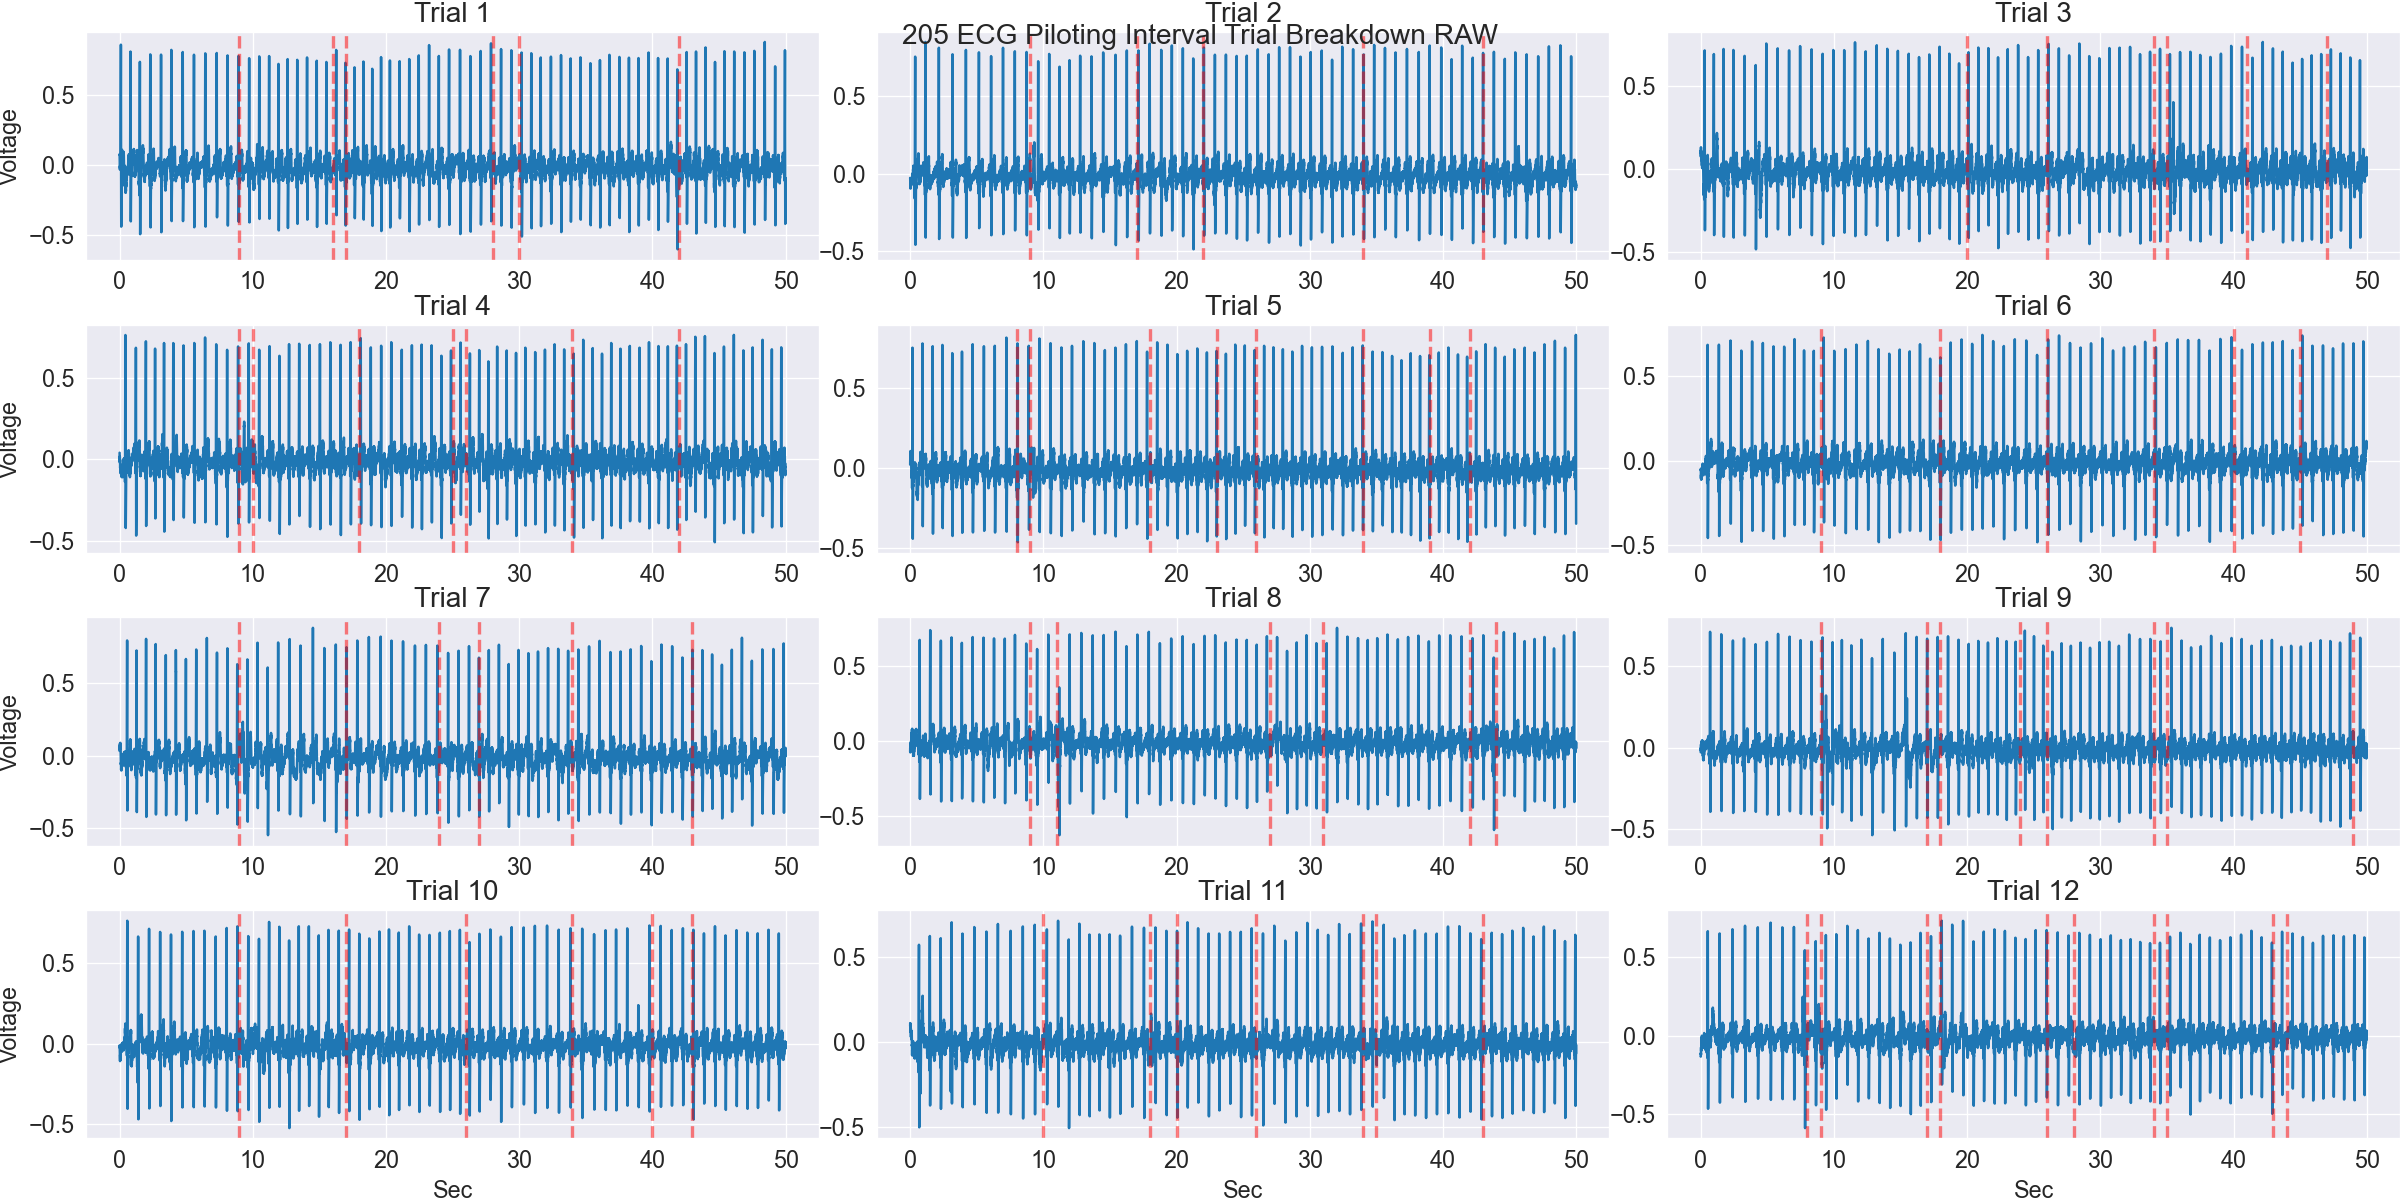

In [9]:
fig, ecg_pilot_axs = plt.subplots(4, 3,figsize=(20,10))
ecg_pilot_axs[0,0].plot(x_axis_pilot, ecg_pilot_interval[1]['ECG_Raw'])
ecg_pilot_axs[0,0].axvline(x=16,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=28,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=30,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[0,0].set_ylabel('Voltage')
ecg_pilot_axs[0,0].set_title('Trial 1')
#ecg_pilot_axs[0,0].set_ylim(-.5,1)

ecg_pilot_axs[0,1].plot(x_axis_pilot, ecg_pilot_interval[2]['ECG_Raw'])
ecg_pilot_axs[0,1].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,1].axvline(x=22,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,1].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,1].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[0,1].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[0,1].set_title('Trial 2')
#ecg_pilot_axs[0,1].set_ylim(-.5,1)

ecg_pilot_axs[0,2].plot(x_axis_pilot, ecg_pilot_interval[3]['ECG_Raw'])
ecg_pilot_axs[0,2].axvline(x=20,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=41,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=47,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[0,2].set_title('Trial 3')
#ecg_pilot_axs[0,2].set_ylim(-.5,1)

ecg_pilot_axs[1,0].plot(x_axis_pilot, ecg_pilot_interval[4]['ECG_Raw'])
ecg_pilot_axs[1,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=10,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=25,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[1,0].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[1,0].set_ylabel('Voltage')
ecg_pilot_axs[1,0].set_title('Trial 4')
#ecg_pilot_axs[1,0].set_ylim(-.5,1)

ecg_pilot_axs[1,1].plot(x_axis_pilot, ecg_pilot_interval[5]['ECG_Raw'])
ecg_pilot_axs[1,1].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=8,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=23,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=39,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[1,1].set_title('Trial 5')
#ecg_pilot_axs[1,1].set_ylim(-.5,1)

ecg_pilot_axs[1,2].plot(x_axis_pilot, ecg_pilot_interval[6]['ECG_Raw'])
ecg_pilot_axs[1,2].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=40,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=45,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[1,2].set_title('Trial 6')
#ecg_pilot_axs[1,2].set_ylim(-.5,1)

ecg_pilot_axs[2,0].plot(x_axis_pilot, ecg_pilot_interval[7]['ECG_Raw'])
ecg_pilot_axs[2,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=24,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=27,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[2,0].set_ylabel('Voltage')
ecg_pilot_axs[2,0].set_title('Trial 7')
#ecg_pilot_axs[2,0].set_ylim(-.5,1)

ecg_pilot_axs[2,1].plot(x_axis_pilot, ecg_pilot_interval[8]['ECG_Raw'])
ecg_pilot_axs[2,1].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=11,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=27,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=31,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=44,linewidth=2, color='r',linestyle='dashed',alpha=.5)



ecg_pilot_axs[2,1].set_title('Trial 8')
#ecg_pilot_axs[2,1].set_ylim(-.5,1)

ecg_pilot_axs[2,2].plot(x_axis_pilot, ecg_pilot_interval[9]['ECG_Raw'])
ecg_pilot_axs[2,2].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=24,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=49,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[2,2].set_title('Trial 9')
#ecg_pilot_axs[2,2].set_ylim(-.5,1)

ecg_pilot_axs[3,0].plot(x_axis_pilot, ecg_pilot_interval[10]['ECG_Raw'])
ecg_pilot_axs[3,0].set_xlabel('Sec')
ecg_pilot_axs[3,0].set_ylabel('Voltage')
ecg_pilot_axs[3,0].set_title('Trial 10')
ecg_pilot_axs[3,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=40,linewidth=2, color='r',linestyle='dashed',alpha=.5)


#ecg_pilot_axs[3,0].set_ylim(-.5,1)

ecg_pilot_axs[3,1].plot(x_axis_pilot, ecg_pilot_interval[11]['ECG_Raw'])
ecg_pilot_axs[3,1].set_xlabel('Sec')

ecg_pilot_axs[3,1].set_title('Trial 11')
ecg_pilot_axs[3,1].axvline(x=10,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=20,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)

#ecg_pilot_axs[3,1].set_ylim(-.5,1)

ecg_pilot_axs[3,2].plot(x_axis_pilot, ecg_pilot_interval[12]['ECG_Raw'])
ecg_pilot_axs[3,2].set_xlabel('Sec')
ecg_pilot_axs[3,2].set_title('Trial 12')
#ecg_pilot_axs[3,2].set_ylim(-.5,1)
ecg_pilot_axs[3,2].axvline(x=8,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=28,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[3,2].axvline(x=44,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)

fig.tight_layout(pad=0)
title=part_number+' ECG Piloting Interval Trial Breakdown RAW'
fig.suptitle(title)
plt.show()
#plt.savefig(save_dir+title)


<IPython.core.display.Javascript object>


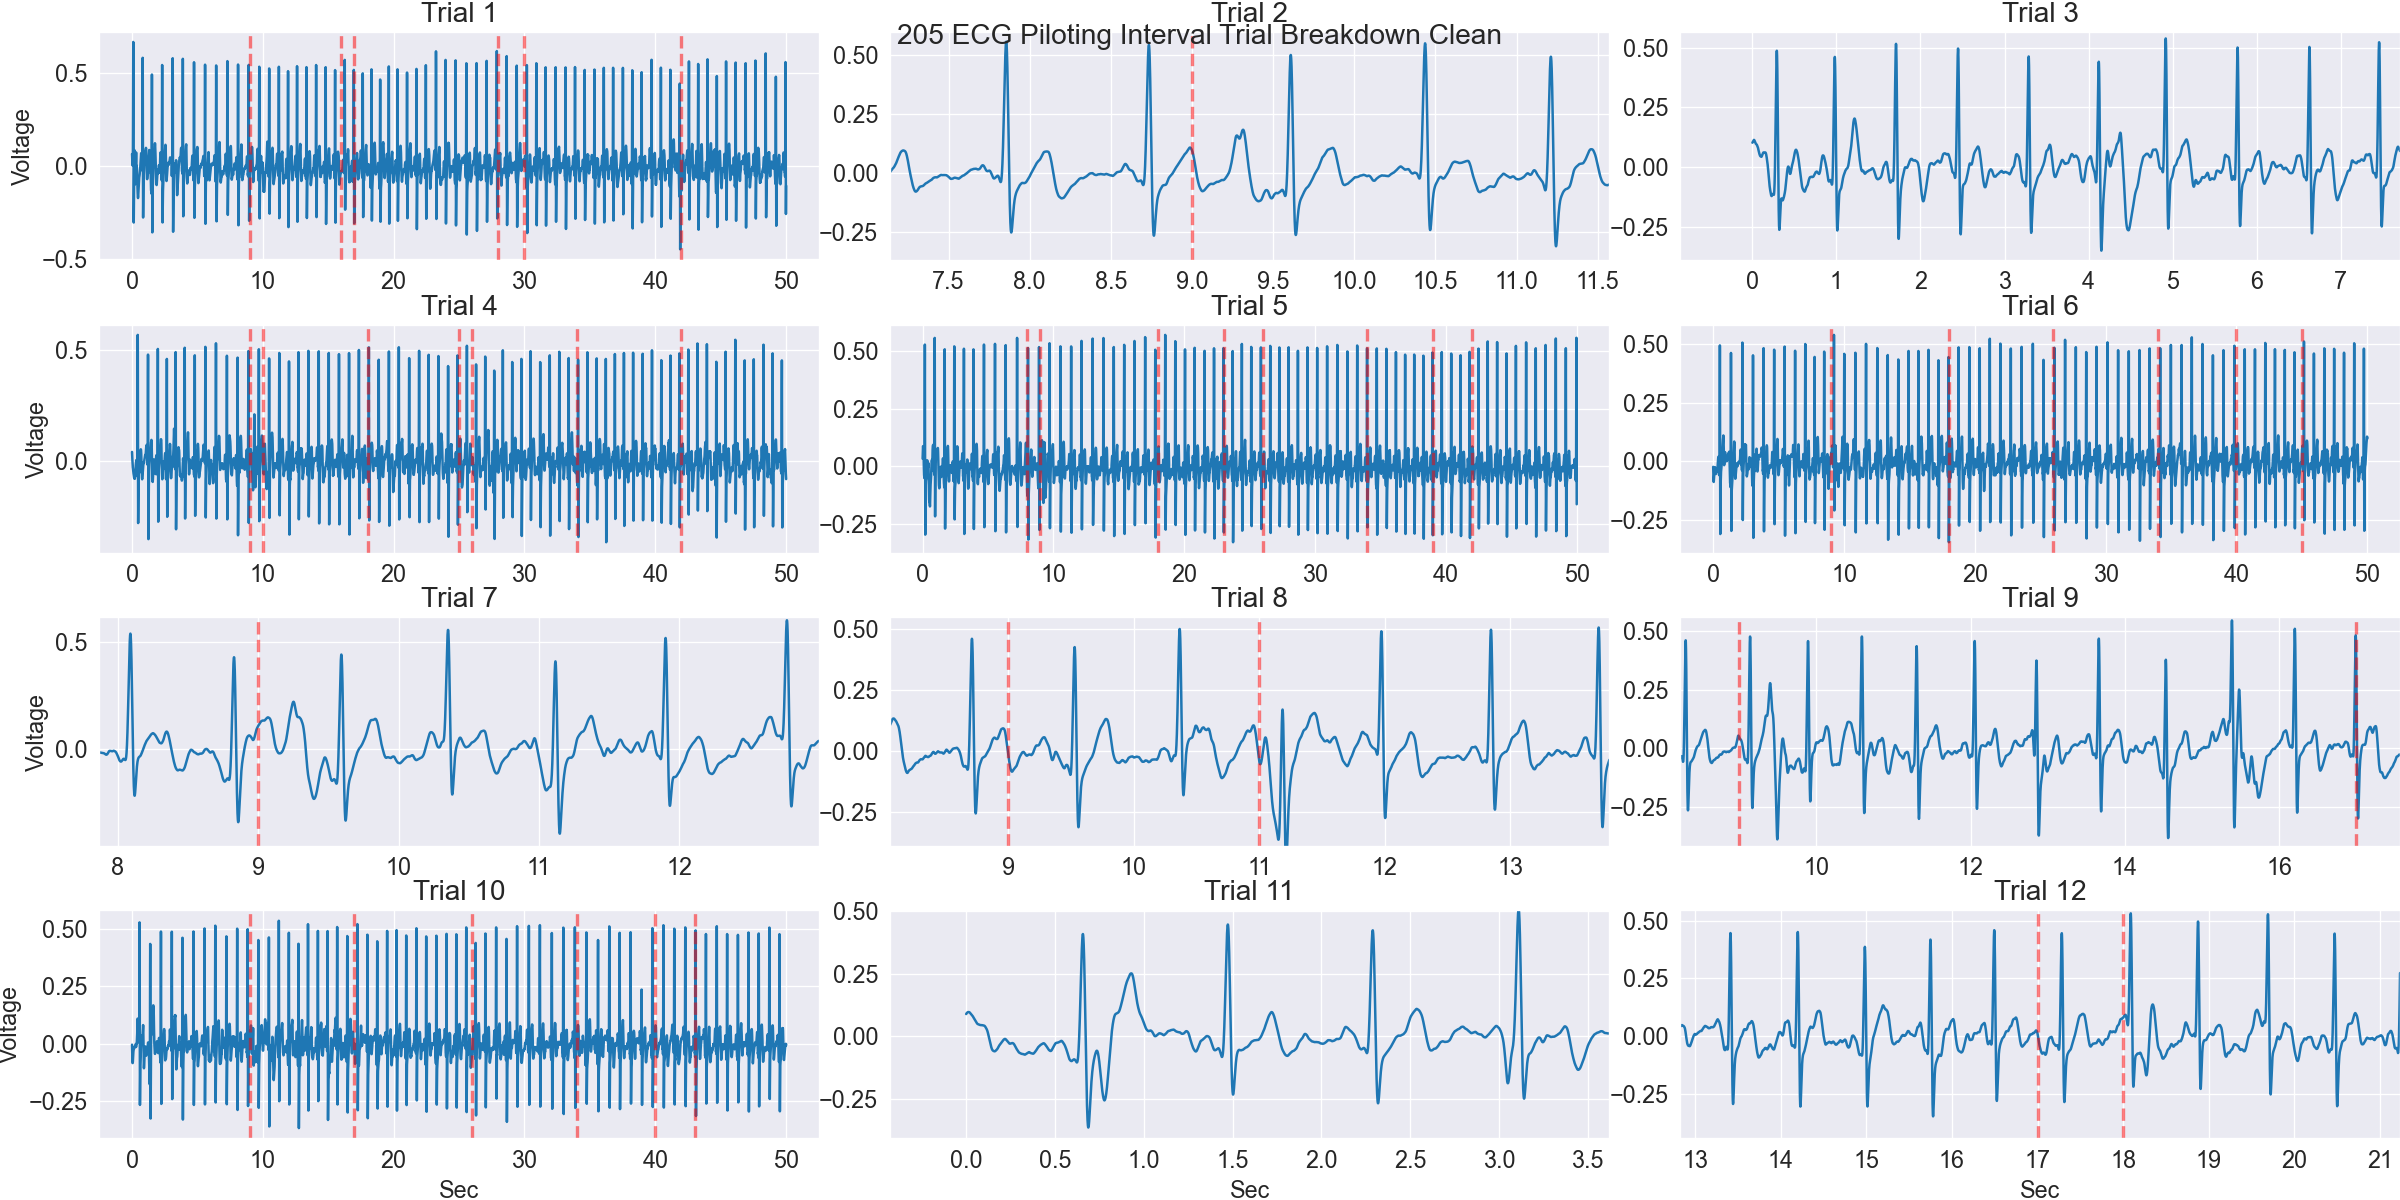

In [10]:
fig, ecg_pilot_axs = plt.subplots(4, 3,figsize=(20,10))
ecg_pilot_axs[0,0].plot(x_axis_pilot, ecg_pilot_interval[1]['ECG_Clean'])
ecg_pilot_axs[0,0].axvline(x=16,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=28,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=30,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[0,0].set_ylabel('Voltage')
ecg_pilot_axs[0,0].set_title('Trial 1')
#ecg_pilot_axs[0,0].set_ylim(-.5,1)

ecg_pilot_axs[0,1].plot(x_axis_pilot, ecg_pilot_interval[2]['ECG_Clean'])
ecg_pilot_axs[0,1].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,1].axvline(x=22,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,1].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,1].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[0,1].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[0,1].set_title('Trial 2')
#ecg_pilot_axs[0,1].set_ylim(-.5,1)

ecg_pilot_axs[0,2].plot(x_axis_pilot, ecg_pilot_interval[3]['ECG_Clean'])
ecg_pilot_axs[0,2].axvline(x=20,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=41,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=47,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[0,2].set_title('Trial 3')
#ecg_pilot_axs[0,2].set_ylim(-.5,1)

ecg_pilot_axs[1,0].plot(x_axis_pilot, ecg_pilot_interval[4]['ECG_Clean'])
ecg_pilot_axs[1,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=10,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=25,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[1,0].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[1,0].set_ylabel('Voltage')
ecg_pilot_axs[1,0].set_title('Trial 4')
#ecg_pilot_axs[1,0].set_ylim(-.5,1)

ecg_pilot_axs[1,1].plot(x_axis_pilot, ecg_pilot_interval[5]['ECG_Clean'])
ecg_pilot_axs[1,1].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=8,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=23,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=39,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[1,1].set_title('Trial 5')
#ecg_pilot_axs[1,1].set_ylim(-.5,1)

ecg_pilot_axs[1,2].plot(x_axis_pilot, ecg_pilot_interval[6]['ECG_Clean'])
ecg_pilot_axs[1,2].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=40,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=45,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[1,2].set_title('Trial 6')
#ecg_pilot_axs[1,2].set_ylim(-.5,1)

ecg_pilot_axs[2,0].plot(x_axis_pilot, ecg_pilot_interval[7]['ECG_Clean'])
ecg_pilot_axs[2,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=24,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=27,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[2,0].set_ylabel('Voltage')
ecg_pilot_axs[2,0].set_title('Trial 7')
#ecg_pilot_axs[2,0].set_ylim(-.5,1)

ecg_pilot_axs[2,1].plot(x_axis_pilot, ecg_pilot_interval[8]['ECG_Clean'])
ecg_pilot_axs[2,1].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=11,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=27,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=31,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=44,linewidth=2, color='r',linestyle='dashed',alpha=.5)



ecg_pilot_axs[2,1].set_title('Trial 8')
#ecg_pilot_axs[2,1].set_ylim(-.5,1)

ecg_pilot_axs[2,2].plot(x_axis_pilot, ecg_pilot_interval[9]['ECG_Clean'])
ecg_pilot_axs[2,2].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=24,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=49,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[2,2].set_title('Trial 9')
#ecg_pilot_axs[2,2].set_ylim(-.5,1)

ecg_pilot_axs[3,0].plot(x_axis_pilot, ecg_pilot_interval[10]['ECG_Clean'])
ecg_pilot_axs[3,0].set_xlabel('Sec')
ecg_pilot_axs[3,0].set_ylabel('Voltage')
ecg_pilot_axs[3,0].set_title('Trial 10')
ecg_pilot_axs[3,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=40,linewidth=2, color='r',linestyle='dashed',alpha=.5)


#ecg_pilot_axs[3,0].set_ylim(-.5,1)

ecg_pilot_axs[3,1].plot(x_axis_pilot, ecg_pilot_interval[11]['ECG_Clean'])
ecg_pilot_axs[3,1].set_xlabel('Sec')

ecg_pilot_axs[3,1].set_title('Trial 11')
ecg_pilot_axs[3,1].axvline(x=10,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=20,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)

#ecg_pilot_axs[3,1].set_ylim(-.5,1)

ecg_pilot_axs[3,2].plot(x_axis_pilot, ecg_pilot_interval[12]['ECG_Clean'])
ecg_pilot_axs[3,2].set_xlabel('Sec')
ecg_pilot_axs[3,2].set_title('Trial 12')
#ecg_pilot_axs[3,2].set_ylim(-.5,1)
ecg_pilot_axs[3,2].axvline(x=8,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=28,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[3,2].axvline(x=44,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)

fig.tight_layout(pad=0)
title=part_number+' ECG Piloting Interval Trial Breakdown Clean'
fig.suptitle(title)
plt.show()
#plt.savefig(save_dir+title)


<IPython.core.display.Javascript object>


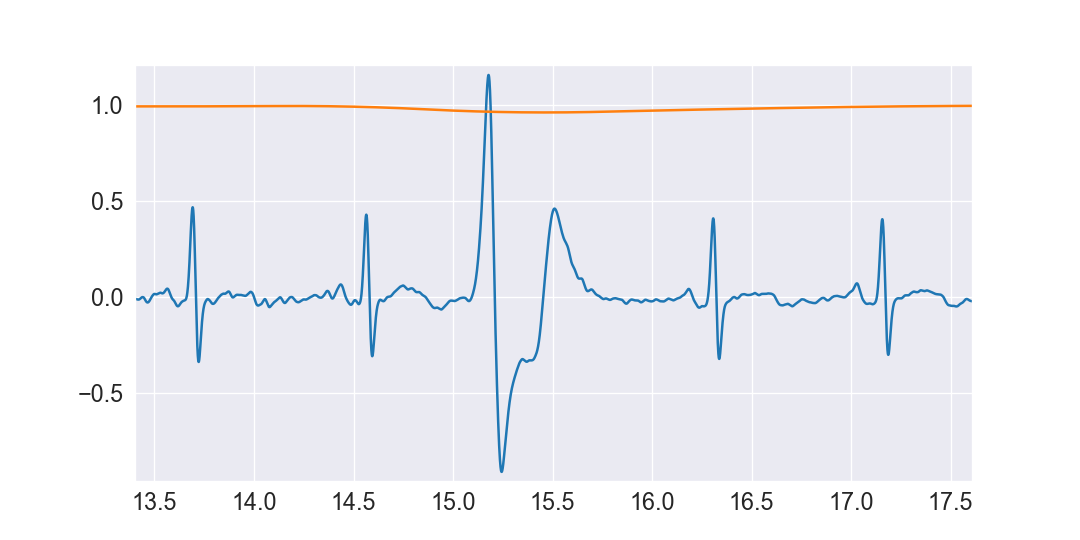

In [45]:
plt.figure()
plt.plot(x_axis_pilot,ecg_pilot_interval[10]['ECG_Clean'])
plt.plot(x_axis_pilot, ecg_pilot_interval[10]['ECG_Quality'])

<IPython.core.display.Javascript object>


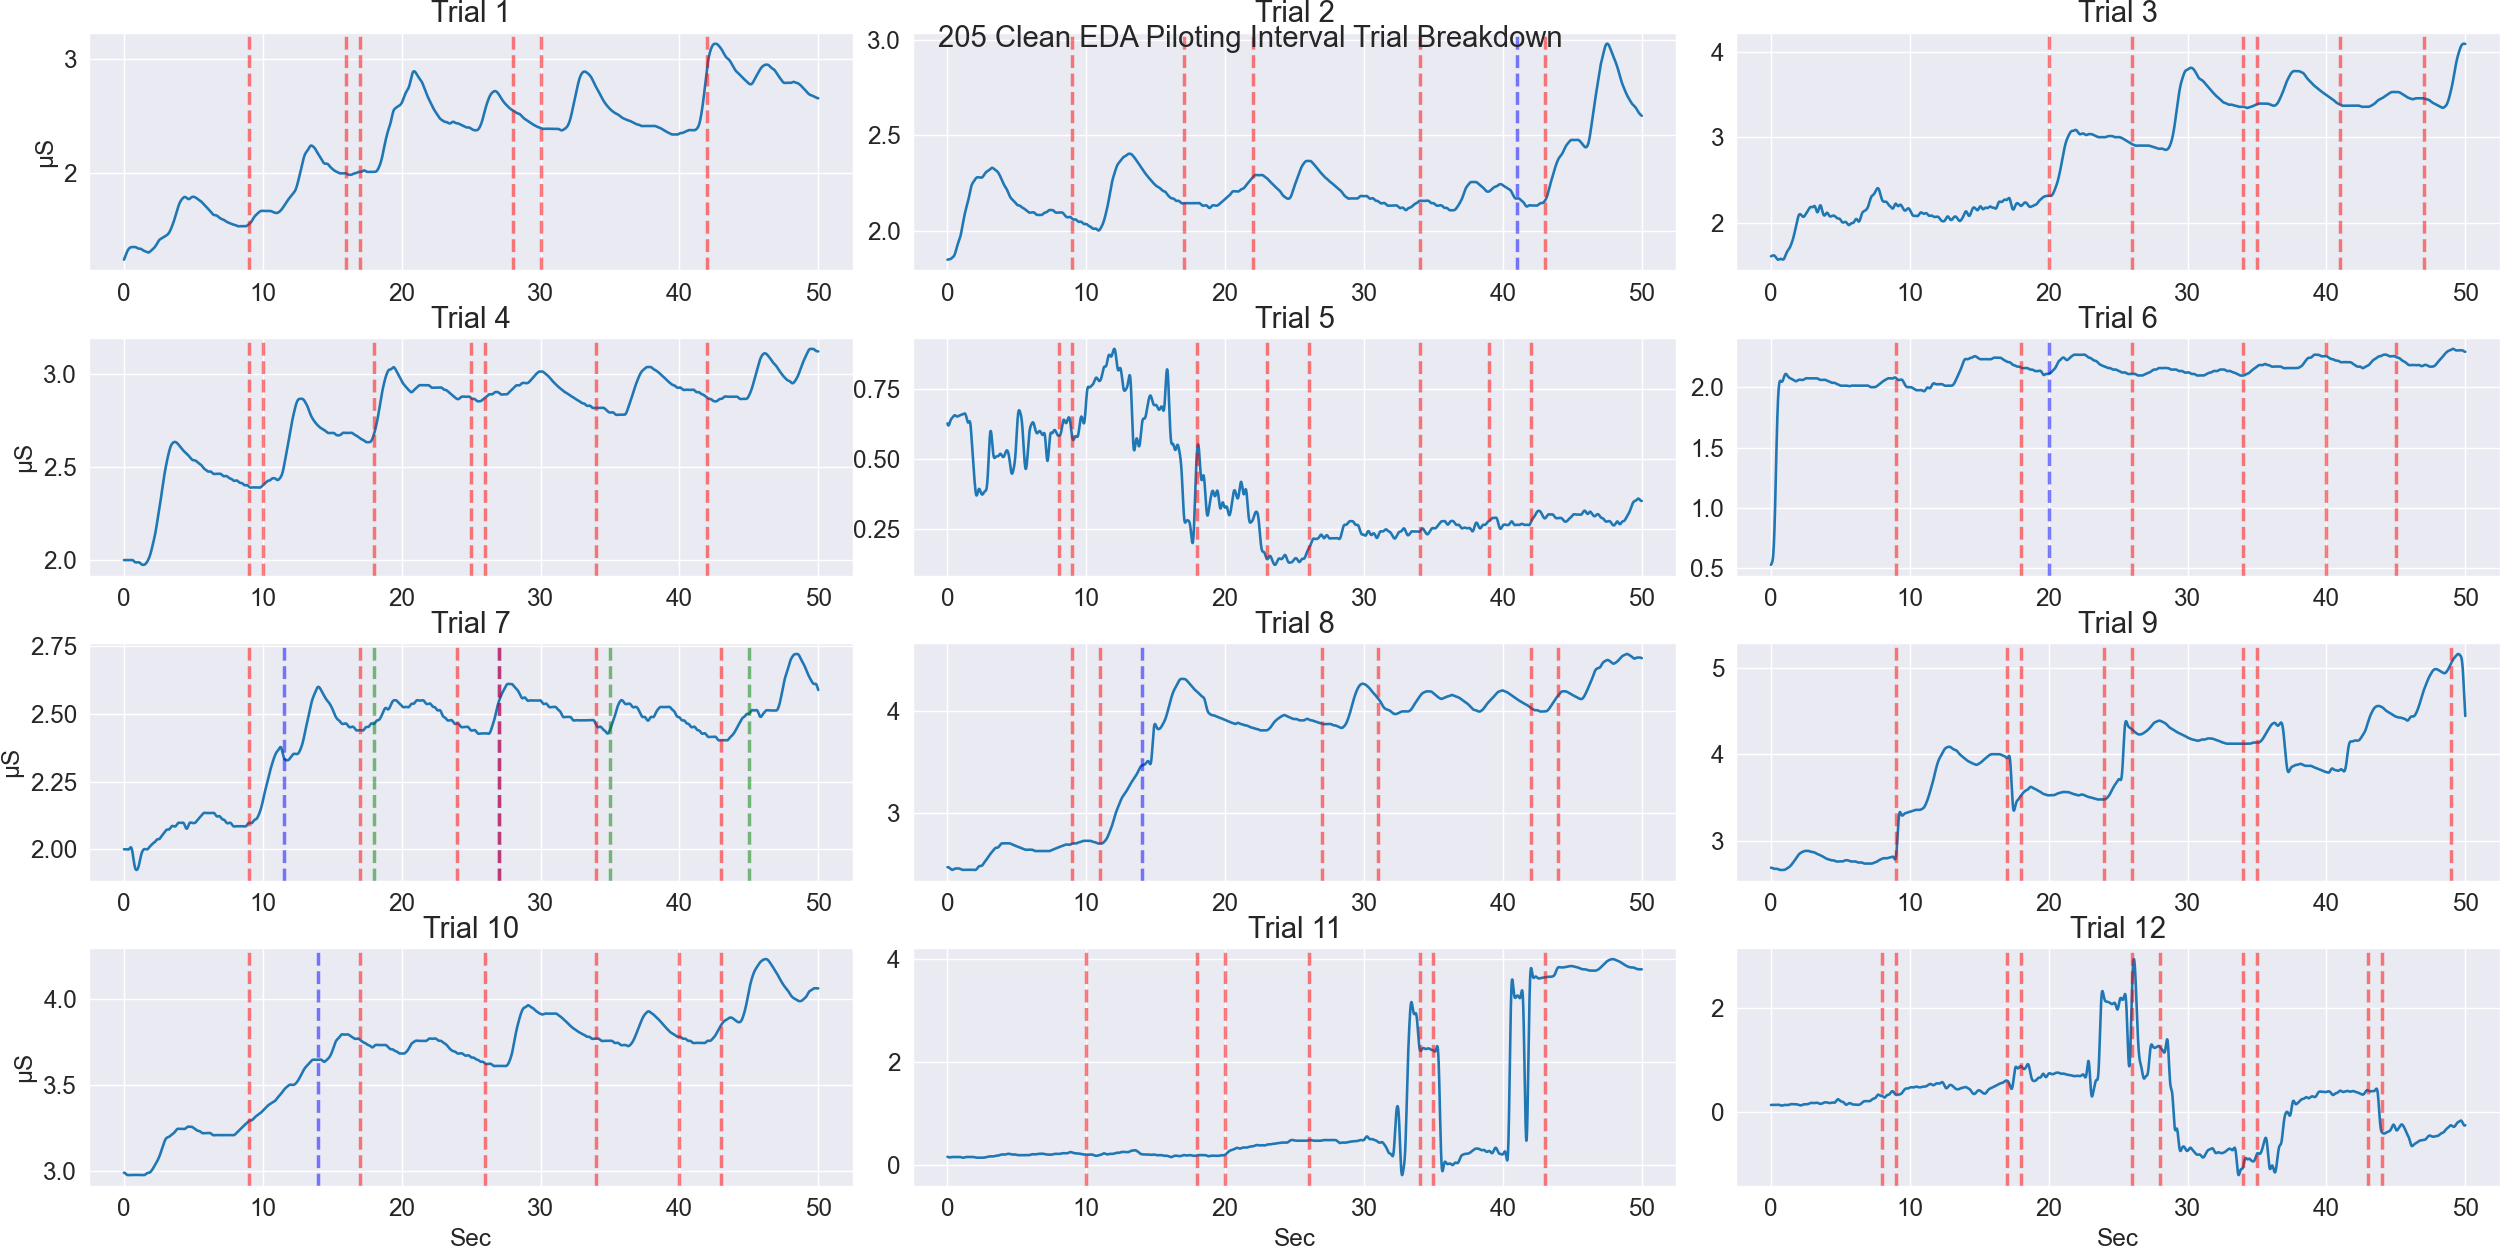

In [9]:
fig, eda_pilot_axs = plt.subplots(4, 3,figsize=(20,10))
eda_pilot_axs[0,0].plot(x_axis_pilot, eda_pilot_interval[1]['EDA_Clean'])

eda_pilot_axs[0,0].set_ylabel('μS')
eda_pilot_axs[0,0].set_title('Trial 1')
#eda_pilot_axs[0,0].set_ylim(-.5,1)

eda_pilot_axs[0,1].plot(x_axis_pilot, eda_pilot_interval[2]['EDA_Clean'])

eda_pilot_axs[0,1].set_title('Trial 2')

eda_pilot_axs[0,1].axvline(x=41,linewidth=2, color='b',linestyle='dashed',alpha=.5)
#eda_pilot_axs[0,1].set_ylim(-.5,1)

eda_pilot_axs[0,2].plot(x_axis_pilot, eda_pilot_interval[3]['EDA_Clean'])

eda_pilot_axs[0,2].set_title('Trial 3')
#eda_pilot_axs[0,2].set_ylim(-.5,1)

eda_pilot_axs[1,0].plot(x_axis_pilot, eda_pilot_interval[4]['EDA_Clean'])

eda_pilot_axs[1,0].set_ylabel('μS')
eda_pilot_axs[1,0].set_title('Trial 4')
#eda_pilot_axs[1,0].set_ylim(-.5,1)

eda_pilot_axs[1,1].plot(x_axis_pilot, eda_pilot_interval[5]['EDA_Clean'])

eda_pilot_axs[1,1].set_title('Trial 5')
#eda_pilot_axs[1,1].set_ylim(-.5,1)

eda_pilot_axs[1,2].plot(x_axis_pilot, eda_pilot_interval[6]['EDA_Clean'])

eda_pilot_axs[1,2].set_title('Trial 6')
#eda_pilot_axs[1,2].set_ylim(-.5,1)

eda_pilot_axs[1,2].axvline(x=20,linewidth=2, color='b',linestyle='dashed',alpha=.5)

eda_pilot_axs[2,0].plot(x_axis_pilot, eda_pilot_interval[7]['EDA_Clean'])

eda_pilot_axs[2,0].set_ylabel('μS')
eda_pilot_axs[2,0].set_title('Trial 7')
#eda_pilot_axs[2,0].set_ylim(-.5,1)

eda_pilot_axs[2,0].axvline(x=11.5,linewidth=2, color='b',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,0].axvline(x=27,linewidth=2, color='b',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,1].plot(x_axis_pilot, eda_pilot_interval[8]['EDA_Clean'])

eda_pilot_axs[2,1].set_title('Trial 8')
#eda_pilot_axs[2,1].set_ylim(-.5,1)
eda_pilot_axs[2,1].axvline(x=14,linewidth=2, color='b',linestyle='dashed',alpha=.5)

eda_pilot_axs[2,2].plot(x_axis_pilot, eda_pilot_interval[9]['EDA_Clean'])

eda_pilot_axs[2,2].set_title('Trial 9')
#eda_pilot_axs[2,2].set_ylim(-.5,1)

eda_pilot_axs[3,0].plot(x_axis_pilot, eda_pilot_interval[10]['EDA_Clean'])
eda_pilot_axs[3,0].set_xlabel('Sec')
eda_pilot_axs[3,0].set_ylabel('μS')
eda_pilot_axs[3,0].set_title('Trial 10')
#eda_pilot_axs[3,0].set_ylim(-.5,1)

eda_pilot_axs[3,0].axvline(x=14,linewidth=2, color='b',linestyle='dashed',alpha=.5)

eda_pilot_axs[3,1].plot(x_axis_pilot, eda_pilot_interval[11]['EDA_Clean'])
eda_pilot_axs[3,1].set_xlabel('Sec')

eda_pilot_axs[3,1].set_title('Trial 11')
#eda_pilot_axs[3,1].set_ylim(-.5,1)

eda_pilot_axs[3,2].plot(x_axis_pilot, eda_pilot_interval[12]['EDA_Clean'])
eda_pilot_axs[3,2].set_xlabel('Sec')
eda_pilot_axs[3,2].set_title('Trial 12')
#eda_pilot_axs[3,2].set_ylim(-.5,1)

eda_pilot_axs[0,0].axvline(x=16,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,0].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,0].axvline(x=28,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,0].axvline(x=30,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,0].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)

eda_pilot_axs[0,1].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,1].axvline(x=22,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,1].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,1].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)

eda_pilot_axs[0,1].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)

eda_pilot_axs[0,2].axvline(x=20,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,2].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,2].axvline(x=41,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[0,2].axvline(x=47,linewidth=2, color='r',linestyle='dashed',alpha=.5)

eda_pilot_axs[1,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,0].axvline(x=10,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,0].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,0].axvline(x=25,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,0].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,0].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)

eda_pilot_axs[1,0].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)

eda_pilot_axs[1,1].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,1].axvline(x=8,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,1].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,1].axvline(x=23,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,1].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,1].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,1].axvline(x=39,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,1].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)

eda_pilot_axs[1,2].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,2].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,2].axvline(x=40,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[1,2].axvline(x=45,linewidth=2, color='r',linestyle='dashed',alpha=.5)


eda_pilot_axs[2,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,0].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,0].axvline(x=24,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,0].axvline(x=27,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,0].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,0].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)

eda_pilot_axs[2,0].axvline(x=18,linewidth=2, color='g',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,0].axvline(x=35,linewidth=2, color='g',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,0].axvline(x=45,linewidth=2, color='g',linestyle='dashed',alpha=.5)

eda_pilot_axs[2,1].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,1].axvline(x=11,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,1].axvline(x=27,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,1].axvline(x=31,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,1].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,1].axvline(x=44,linewidth=2, color='r',linestyle='dashed',alpha=.5)


eda_pilot_axs[2,2].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,2].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,2].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,2].axvline(x=24,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,2].axvline(x=49,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[2,2].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)


eda_pilot_axs[3,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,0].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,0].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,0].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,0].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,0].axvline(x=40,linewidth=2, color='r',linestyle='dashed',alpha=.5)


eda_pilot_axs[3,1].axvline(x=10,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,1].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,1].axvline(x=20,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,1].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,1].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,1].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,1].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)


eda_pilot_axs[3,2].axvline(x=8,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,2].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,2].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,2].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,2].axvline(x=28,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,2].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)

eda_pilot_axs[3,2].axvline(x=44,linewidth=2, color='r',linestyle='dashed',alpha=.5)
eda_pilot_axs[3,2].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)









fig.tight_layout(pad=0)
title=part_number+' Clean EDA Piloting Interval Trial Breakdown'
fig.suptitle(title)
plt.show()
#plt.savefig(save_dir+title)


<IPython.core.display.Javascript object>


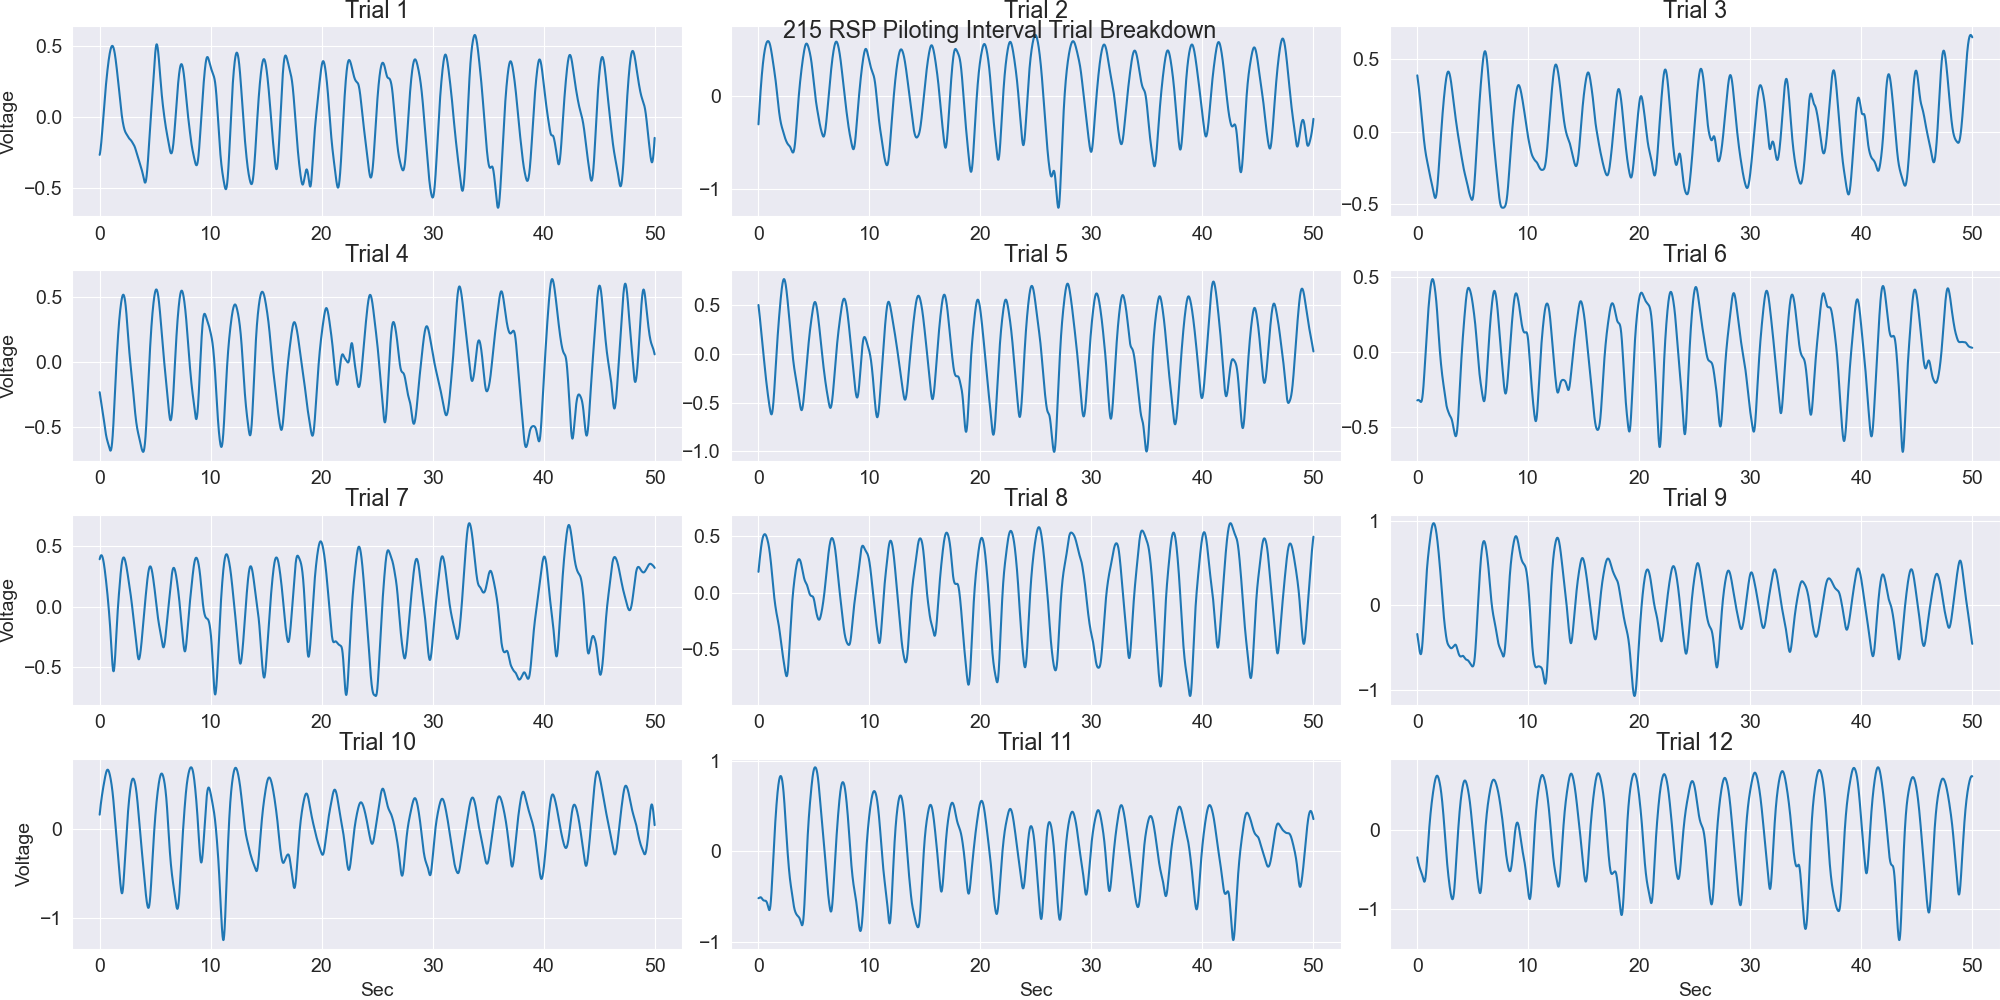

In [33]:
fig, rsp_pilot_axs = plt.subplots(4, 3,figsize=(20,10))
rsp_pilot_axs[0,0].plot(x_axis_pilot, rsp_pilot_interval[1]['RSP_Clean'])

rsp_pilot_axs[0,0].set_ylabel('Voltage')
rsp_pilot_axs[0,0].set_title('Trial 1')
#rsp_pilot_axs[0,0].set_ylim(-.5,1)

rsp_pilot_axs[0,1].plot(x_axis_pilot, rsp_pilot_interval[2]['RSP_Clean'])

rsp_pilot_axs[0,1].set_title('Trial 2')
#rsp_pilot_axs[0,1].set_ylim(-.5,1)

rsp_pilot_axs[0,2].plot(x_axis_pilot, rsp_pilot_interval[3]['RSP_Clean'])

rsp_pilot_axs[0,2].set_title('Trial 3')
#rsp_pilot_axs[0,2].set_ylim(-.5,1)

rsp_pilot_axs[1,0].plot(x_axis_pilot, rsp_pilot_interval[4]['RSP_Clean'])

rsp_pilot_axs[1,0].set_ylabel('Voltage')
rsp_pilot_axs[1,0].set_title('Trial 4')
#rsp_pilot_axs[1,0].set_ylim(-.5,1)

rsp_pilot_axs[1,1].plot(x_axis_pilot, rsp_pilot_interval[5]['RSP_Clean'])

rsp_pilot_axs[1,1].set_title('Trial 5')
#rsp_pilot_axs[1,1].set_ylim(-.5,1)

rsp_pilot_axs[1,2].plot(x_axis_pilot, rsp_pilot_interval[6]['RSP_Clean'])

rsp_pilot_axs[1,2].set_title('Trial 6')
#rsp_pilot_axs[1,2].set_ylim(-.5,1)

rsp_pilot_axs[2,0].plot(x_axis_pilot, rsp_pilot_interval[7]['RSP_Clean'])

rsp_pilot_axs[2,0].set_ylabel('Voltage')
rsp_pilot_axs[2,0].set_title('Trial 7')
#rsp_pilot_axs[2,0].set_ylim(-.5,1)

rsp_pilot_axs[2,1].plot(x_axis_pilot, rsp_pilot_interval[8]['RSP_Clean'])

rsp_pilot_axs[2,1].set_title('Trial 8')
#rsp_pilot_axs[2,1].set_ylim(-.5,1)

rsp_pilot_axs[2,2].plot(x_axis_pilot, rsp_pilot_interval[9]['RSP_Clean'])

rsp_pilot_axs[2,2].set_title('Trial 9')
#rsp_pilot_axs[2,2].set_ylim(-.5,1)

rsp_pilot_axs[3,0].plot(x_axis_pilot, rsp_pilot_interval[10]['RSP_Clean'])
rsp_pilot_axs[3,0].set_xlabel('Sec')
rsp_pilot_axs[3,0].set_ylabel('Voltage')
rsp_pilot_axs[3,0].set_title('Trial 10')
#rsp_pilot_axs[3,0].set_ylim(-.5,1)

rsp_pilot_axs[3,1].plot(x_axis_pilot, rsp_pilot_interval[11]['RSP_Clean'])
rsp_pilot_axs[3,1].set_xlabel('Sec')

rsp_pilot_axs[3,1].set_title('Trial 11')
#rsp_pilot_axs[3,1].set_ylim(-.5,1)

rsp_pilot_axs[3,2].plot(x_axis_pilot, rsp_pilot_interval[12]['RSP_Clean'])
rsp_pilot_axs[3,2].set_xlabel('Sec')
rsp_pilot_axs[3,2].set_title('Trial 12')
#rsp_pilot_axs[3,2].set_ylim(-.5,1)

fig.tight_layout(pad=0)
title=part_number+' RSP Piloting Interval Trial Breakdown'
fig.suptitle(title)
plt.show()
plt.savefig(save_dir+title)


In [34]:
x_axis_trust = np.linspace(0, ecg_trust_interval[1].shape[0]/ sampling_rate, ecg_trust_interval[1].shape[0])

<IPython.core.display.Javascript object>


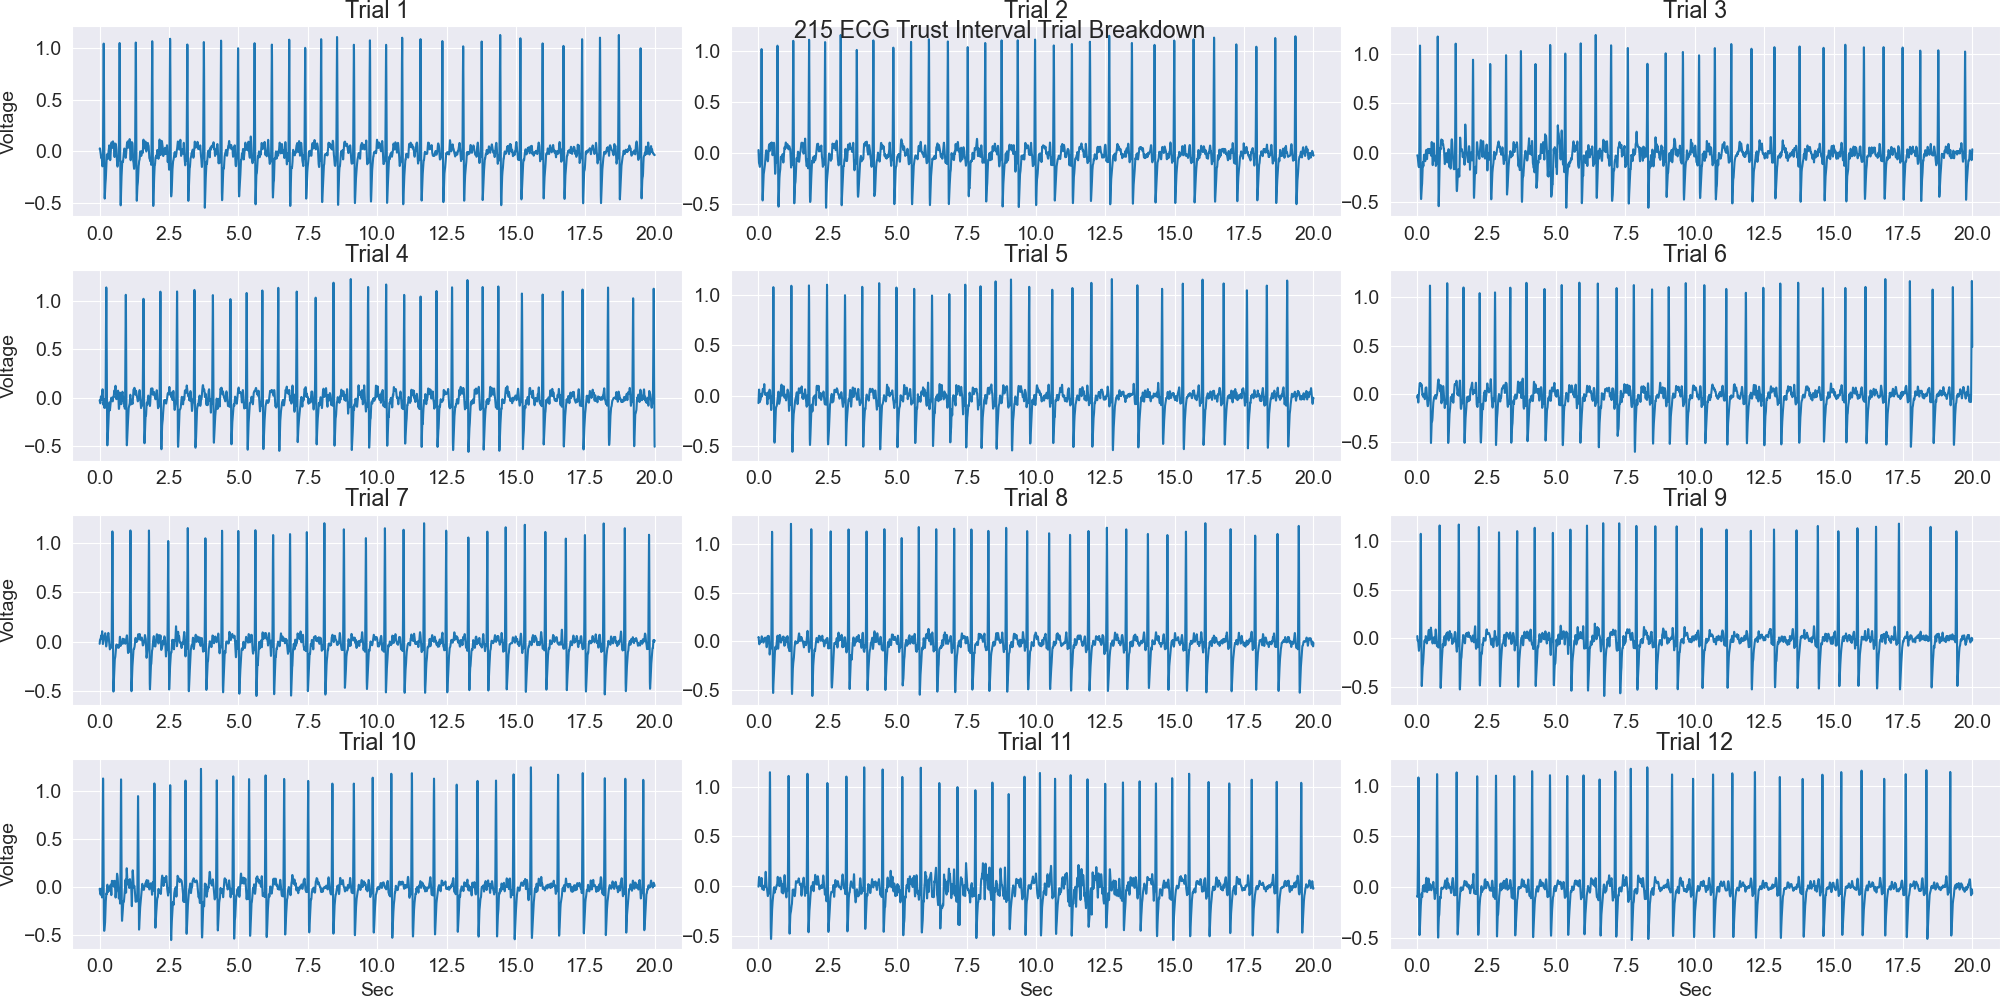

In [35]:
fig, ecg_trust_axs = plt.subplots(4, 3,figsize=(20,10))
ecg_trust_axs[0,0].plot(x_axis_trust, ecg_trust_interval[1]['ECG_Clean'])

ecg_trust_axs[0,0].set_ylabel('Voltage')
ecg_trust_axs[0,0].set_title('Trial 1')
#ecg_trust_axs[0,0].set_ylim(-.5,1)

ecg_trust_axs[0,1].plot(x_axis_trust, ecg_trust_interval[2]['ECG_Clean'])

ecg_trust_axs[0,1].set_title('Trial 2')
#ecg_trust_axs[0,1].set_ylim(-.5,1)

ecg_trust_axs[0,2].plot(x_axis_trust, ecg_trust_interval[3]['ECG_Clean'])

ecg_trust_axs[0,2].set_title('Trial 3')
#ecg_trust_axs[0,2].set_ylim(-.5,1)

ecg_trust_axs[1,0].plot(x_axis_trust, ecg_trust_interval[4]['ECG_Clean'])

ecg_trust_axs[1,0].set_ylabel('Voltage')
ecg_trust_axs[1,0].set_title('Trial 4')
#ecg_trust_axs[1,0].set_ylim(-.5,1)

ecg_trust_axs[1,1].plot(x_axis_trust, ecg_trust_interval[5]['ECG_Clean'])

ecg_trust_axs[1,1].set_title('Trial 5')
#ecg_trust_axs[1,1].set_ylim(-.5,1)

ecg_trust_axs[1,2].plot(x_axis_trust, ecg_trust_interval[6]['ECG_Clean'])

ecg_trust_axs[1,2].set_title('Trial 6')
#ecg_trust_axs[1,2].set_ylim(-.5,1)

ecg_trust_axs[2,0].plot(x_axis_trust, ecg_trust_interval[7]['ECG_Clean'])

ecg_trust_axs[2,0].set_ylabel('Voltage')
ecg_trust_axs[2,0].set_title('Trial 7')
#ecg_trust_axs[2,0].set_ylim(-.5,1)

ecg_trust_axs[2,1].plot(x_axis_trust, ecg_trust_interval[8]['ECG_Clean'])

ecg_trust_axs[2,1].set_title('Trial 8')
#ecg_trust_axs[2,1].set_ylim(-.5,1)

ecg_trust_axs[2,2].plot(x_axis_trust, ecg_trust_interval[9]['ECG_Clean'])

ecg_trust_axs[2,2].set_title('Trial 9')
#ecg_trust_axs[2,2].set_ylim(-.5,1)

ecg_trust_axs[3,0].plot(x_axis_trust, ecg_trust_interval[10]['ECG_Clean'])
ecg_trust_axs[3,0].set_xlabel('Sec')
ecg_trust_axs[3,0].set_ylabel('Voltage')
ecg_trust_axs[3,0].set_title('Trial 10')
#ecg_trust_axs[3,0].set_ylim(-.5,1)

ecg_trust_axs[3,1].plot(x_axis_trust, ecg_trust_interval[11]['ECG_Clean'])
ecg_trust_axs[3,1].set_xlabel('Sec')

ecg_trust_axs[3,1].set_title('Trial 11')
#ecg_trust_axs[3,1].set_ylim(-.5,1)

ecg_trust_axs[3,2].plot(x_axis_trust, ecg_trust_interval[12]['ECG_Clean'])
ecg_trust_axs[3,2].set_xlabel('Sec')
ecg_trust_axs[3,2].set_title('Trial 12')
#ecg_trust_axs[3,2].set_ylim(-.5,1)

fig.tight_layout(pad=0)
title=part_number+' ECG Trust Interval Trial Breakdown'
fig.suptitle(title)
plt.show()
plt.savefig(save_dir+title)


<IPython.core.display.Javascript object>


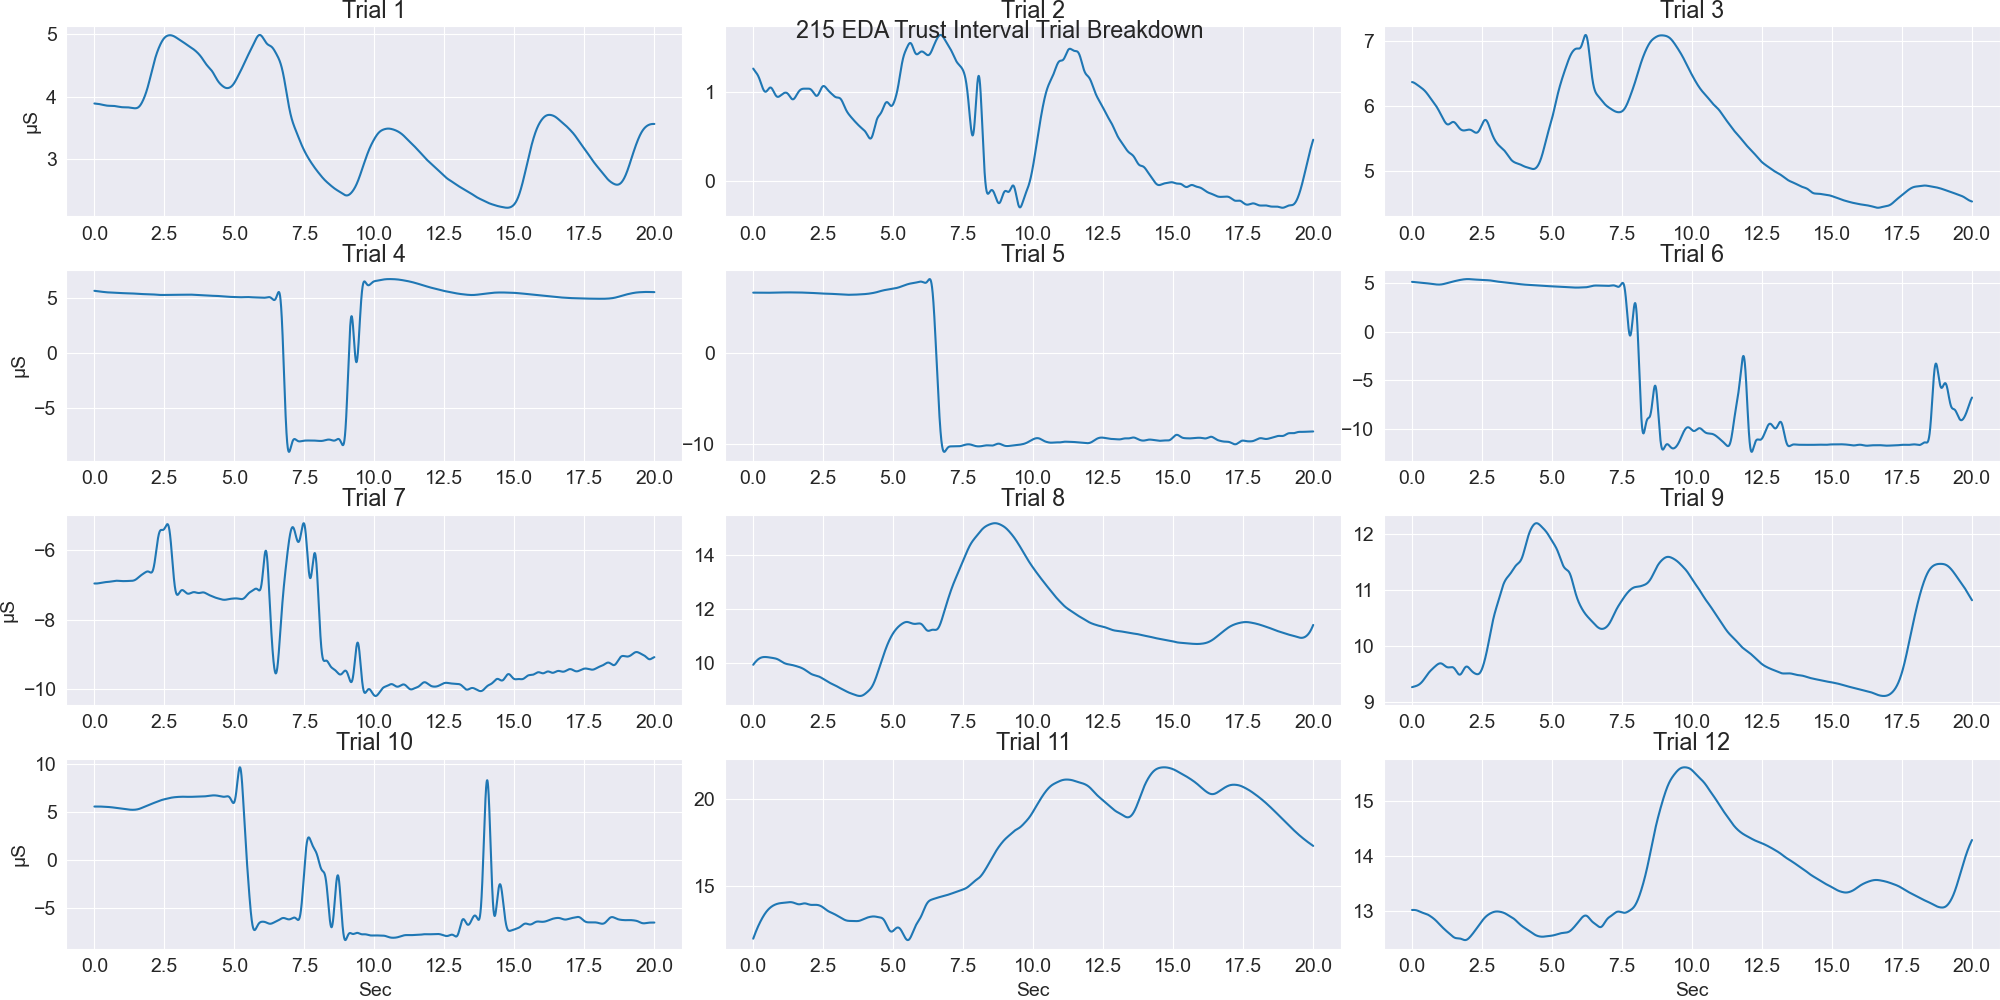

In [36]:
fig, eda_trust_axs = plt.subplots(4, 3,figsize=(20,10))
eda_trust_axs[0,0].plot(x_axis_trust, eda_trust_interval[1]['EDA_Clean'])

eda_trust_axs[0,0].set_ylabel('μS')
eda_trust_axs[0,0].set_title('Trial 1')
#eda_trust_axs[0,0].set_ylim(-.5,1)

eda_trust_axs[0,1].plot(x_axis_trust, eda_trust_interval[2]['EDA_Clean'])

eda_trust_axs[0,1].set_title('Trial 2')
#eda_trust_axs[0,1].set_ylim(-.5,1)

eda_trust_axs[0,2].plot(x_axis_trust, eda_trust_interval[3]['EDA_Clean'])

eda_trust_axs[0,2].set_title('Trial 3')
#eda_trust_axs[0,2].set_ylim(-.5,1)

eda_trust_axs[1,0].plot(x_axis_trust, eda_trust_interval[4]['EDA_Clean'])

eda_trust_axs[1,0].set_ylabel('μS')
eda_trust_axs[1,0].set_title('Trial 4')
#eda_trust_axs[1,0].set_ylim(-.5,1)

eda_trust_axs[1,1].plot(x_axis_trust, eda_trust_interval[5]['EDA_Clean'])

eda_trust_axs[1,1].set_title('Trial 5')
#eda_trust_axs[1,1].set_ylim(-.5,1)

eda_trust_axs[1,2].plot(x_axis_trust, eda_trust_interval[6]['EDA_Clean'])

eda_trust_axs[1,2].set_title('Trial 6')
#eda_trust_axs[1,2].set_ylim(-.5,1)

eda_trust_axs[2,0].plot(x_axis_trust, eda_trust_interval[7]['EDA_Clean'])

eda_trust_axs[2,0].set_ylabel('μS')
eda_trust_axs[2,0].set_title('Trial 7')
#eda_trust_axs[2,0].set_ylim(-.5,1)

eda_trust_axs[2,1].plot(x_axis_trust, eda_trust_interval[8]['EDA_Clean'])

eda_trust_axs[2,1].set_title('Trial 8')
#eda_trust_axs[2,1].set_ylim(-.5,1)

eda_trust_axs[2,2].plot(x_axis_trust, eda_trust_interval[9]['EDA_Clean'])

eda_trust_axs[2,2].set_title('Trial 9')
#eda_trust_axs[2,2].set_ylim(-.5,1)

eda_trust_axs[3,0].plot(x_axis_trust, eda_trust_interval[10]['EDA_Clean'])
eda_trust_axs[3,0].set_xlabel('Sec')
eda_trust_axs[3,0].set_ylabel('μS')
eda_trust_axs[3,0].set_title('Trial 10')
#eda_trust_axs[3,0].set_ylim(-.5,1)

eda_trust_axs[3,1].plot(x_axis_trust, eda_trust_interval[11]['EDA_Clean'])
eda_trust_axs[3,1].set_xlabel('Sec')

eda_trust_axs[3,1].set_title('Trial 11')
#eda_trust_axs[3,1].set_ylim(-.5,1)

eda_trust_axs[3,2].plot(x_axis_trust, eda_trust_interval[12]['EDA_Clean'])
eda_trust_axs[3,2].set_xlabel('Sec')
eda_trust_axs[3,2].set_title('Trial 12')
#eda_trust_axs[3,2].set_ylim(-.5,1)

fig.tight_layout(pad=0)
title=part_number+' EDA Trust Interval Trial Breakdown'
fig.suptitle(title)
plt.show()
plt.savefig(save_dir+title)


<IPython.core.display.Javascript object>


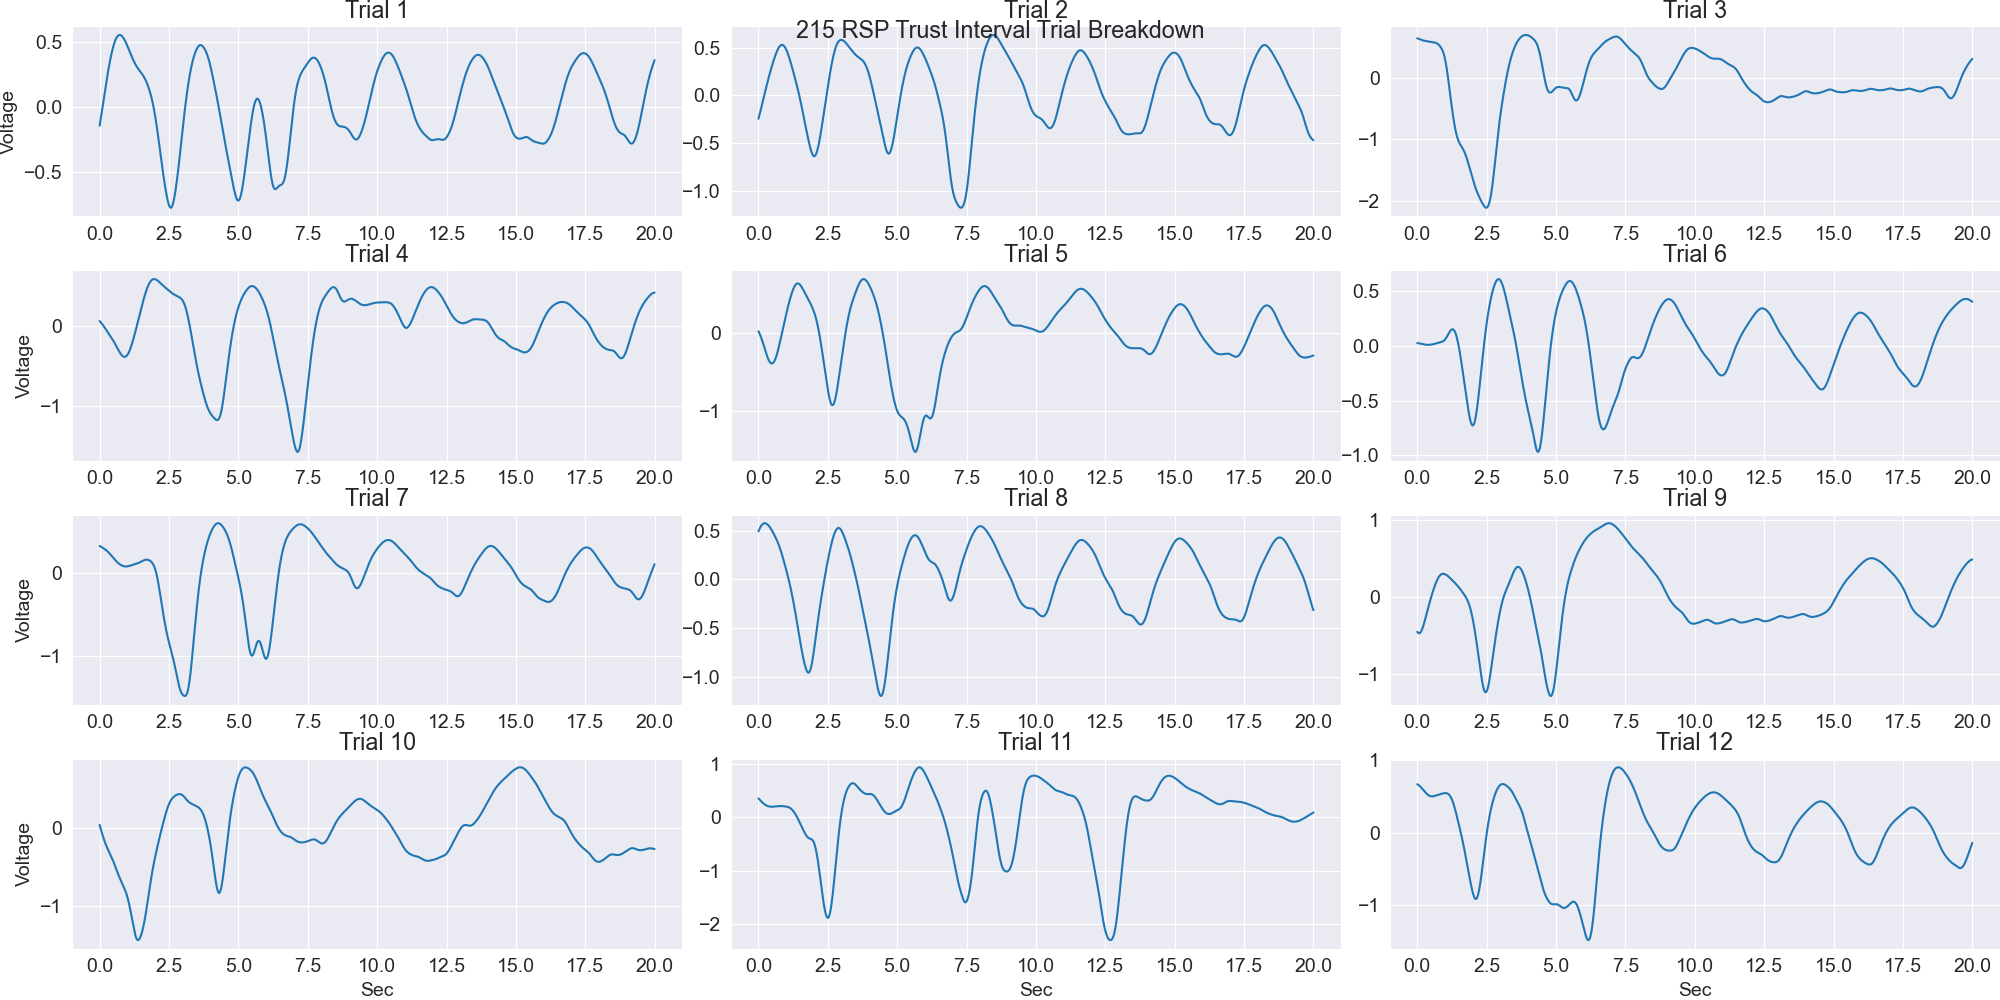

In [37]:
fig, rsp_trust_axs = plt.subplots(4, 3,figsize=(20,10))
rsp_trust_axs[0,0].plot(x_axis_trust, rsp_trust_interval[1]['RSP_Clean'])

rsp_trust_axs[0,0].set_ylabel('Voltage')
rsp_trust_axs[0,0].set_title('Trial 1')
#rsp_trust_axs[0,0].set_ylim(-.5,1)

rsp_trust_axs[0,1].plot(x_axis_trust, rsp_trust_interval[2]['RSP_Clean'])

rsp_trust_axs[0,1].set_title('Trial 2')
#rsp_trust_axs[0,1].set_ylim(-.5,1)

rsp_trust_axs[0,2].plot(x_axis_trust, rsp_trust_interval[3]['RSP_Clean'])

rsp_trust_axs[0,2].set_title('Trial 3')
#rsp_trust_axs[0,2].set_ylim(-.5,1)

rsp_trust_axs[1,0].plot(x_axis_trust, rsp_trust_interval[4]['RSP_Clean'])

rsp_trust_axs[1,0].set_ylabel('Voltage')
rsp_trust_axs[1,0].set_title('Trial 4')
#rsp_trust_axs[1,0].set_ylim(-.5,1)

rsp_trust_axs[1,1].plot(x_axis_trust, rsp_trust_interval[5]['RSP_Clean'])

rsp_trust_axs[1,1].set_title('Trial 5')
#rsp_trust_axs[1,1].set_ylim(-.5,1)

rsp_trust_axs[1,2].plot(x_axis_trust, rsp_trust_interval[6]['RSP_Clean'])

rsp_trust_axs[1,2].set_title('Trial 6')
#rsp_trust_axs[1,2].set_ylim(-.5,1)

rsp_trust_axs[2,0].plot(x_axis_trust, rsp_trust_interval[7]['RSP_Clean'])

rsp_trust_axs[2,0].set_ylabel('Voltage')
rsp_trust_axs[2,0].set_title('Trial 7')
#rsp_trust_axs[2,0].set_ylim(-.5,1)

rsp_trust_axs[2,1].plot(x_axis_trust, rsp_trust_interval[8]['RSP_Clean'])

rsp_trust_axs[2,1].set_title('Trial 8')
#rsp_trust_axs[2,1].set_ylim(-.5,1)

rsp_trust_axs[2,2].plot(x_axis_trust, rsp_trust_interval[9]['RSP_Clean'])

rsp_trust_axs[2,2].set_title('Trial 9')
#rsp_trust_axs[2,2].set_ylim(-.5,1)

rsp_trust_axs[3,0].plot(x_axis_trust, rsp_trust_interval[10]['RSP_Clean'])
rsp_trust_axs[3,0].set_xlabel('Sec')
rsp_trust_axs[3,0].set_ylabel('Voltage')
rsp_trust_axs[3,0].set_title('Trial 10')
#rsp_trust_axs[3,0].set_ylim(-.5,1)

rsp_trust_axs[3,1].plot(x_axis_trust, rsp_trust_interval[11]['RSP_Clean'])
rsp_trust_axs[3,1].set_xlabel('Sec')

rsp_trust_axs[3,1].set_title('Trial 11')
#rsp_trust_axs[3,1].set_ylim(-.5,1)

rsp_trust_axs[3,2].plot(x_axis_trust, rsp_trust_interval[12]['RSP_Clean'])
rsp_trust_axs[3,2].set_xlabel('Sec')
rsp_trust_axs[3,2].set_title('Trial 12')
#rsp_trust_axs[3,2].set_ylim(-.5,1)

fig.tight_layout(pad=0)
title=part_number+' RSP Trust Interval Trial Breakdown'
fig.suptitle(title)
plt.show()
plt.savefig(save_dir+title)


In [38]:
x_axis_trust_event = np.linspace(-5, ecg_trust_event[1].shape[0]/ sampling_rate - 5, ecg_trust_event[1].shape[0])

<IPython.core.display.Javascript object>


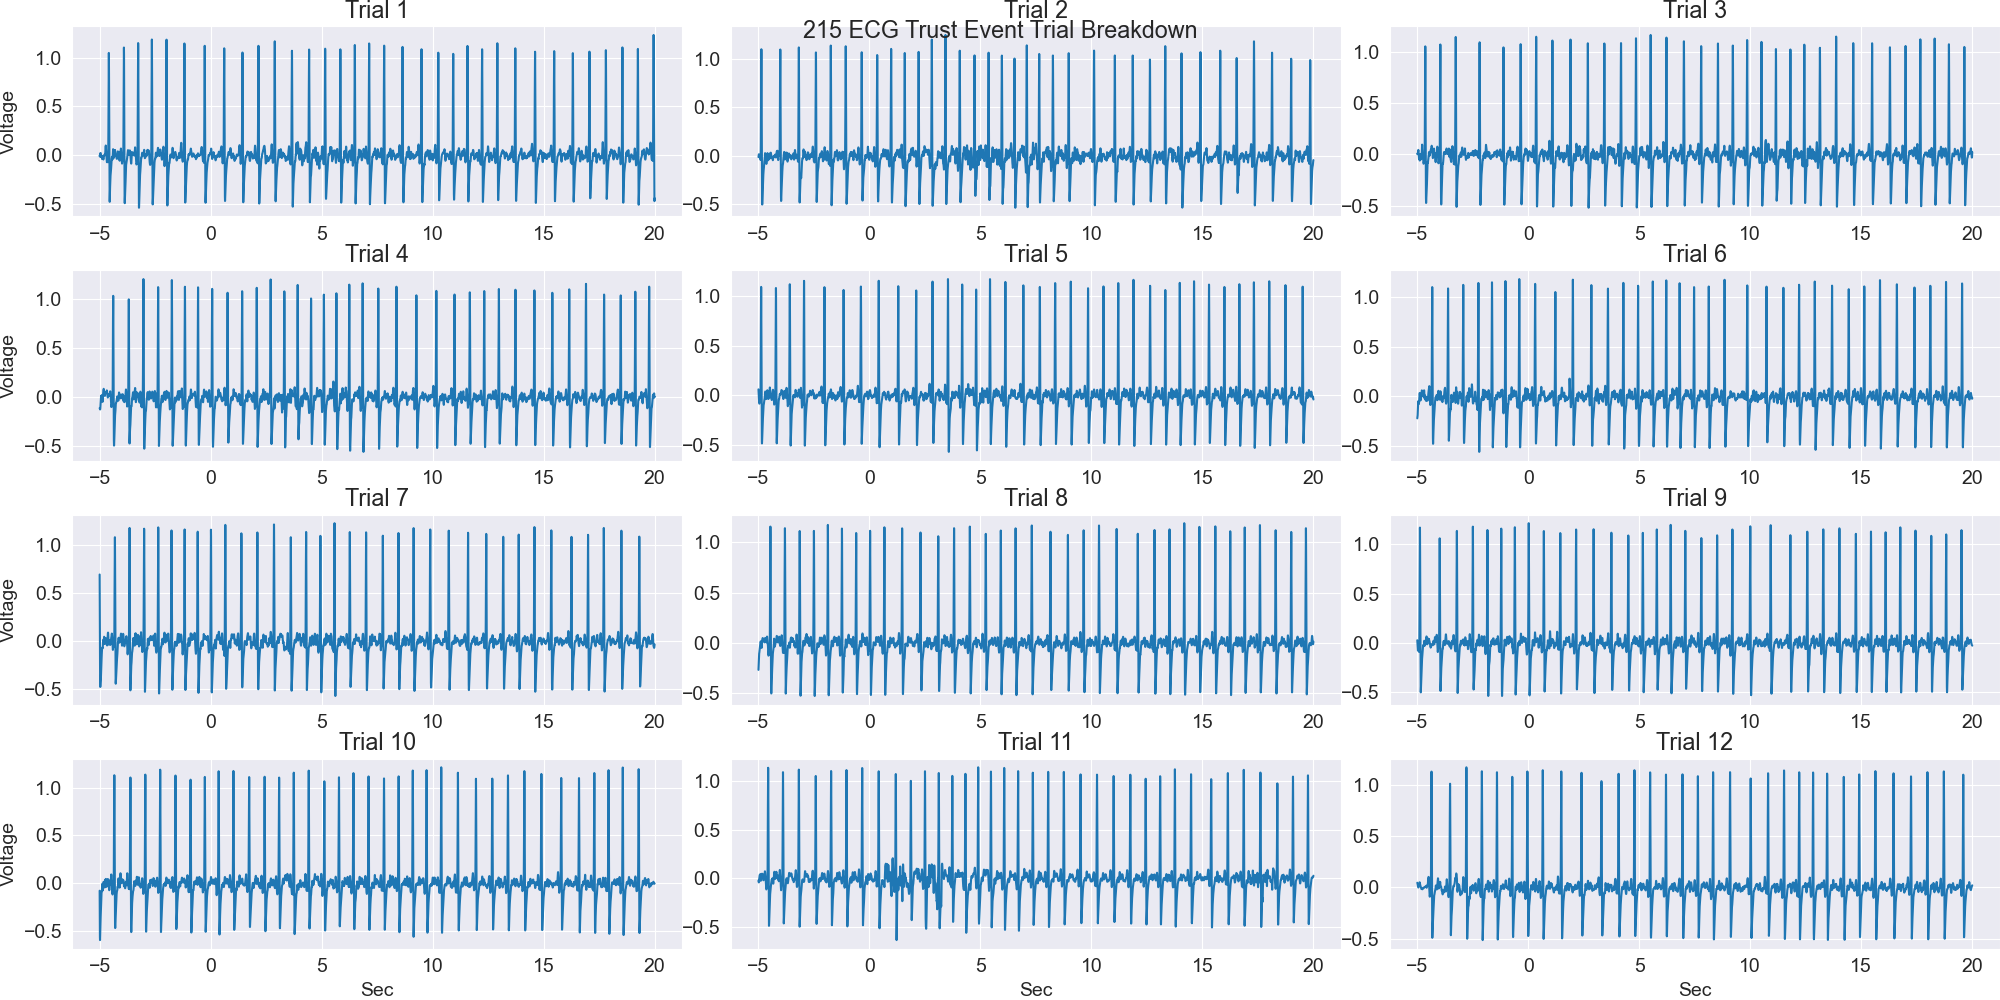

In [39]:
fig, ecg_trust_axs = plt.subplots(4, 3,figsize=(20,10))
ecg_trust_axs[0,0].plot(x_axis_trust_event, ecg_trust_event[1]['ECG_Clean'])

ecg_trust_axs[0,0].set_ylabel('Voltage')
ecg_trust_axs[0,0].set_title('Trial 1')
#ecg_trust_axs[0,0].set_ylim(-.5,1)

ecg_trust_axs[0,1].plot(x_axis_trust_event, ecg_trust_event[2]['ECG_Clean'])

ecg_trust_axs[0,1].set_title('Trial 2')
#ecg_trust_axs[0,1].set_ylim(-.5,1)

ecg_trust_axs[0,2].plot(x_axis_trust_event, ecg_trust_event[3]['ECG_Clean'])

ecg_trust_axs[0,2].set_title('Trial 3')
#ecg_trust_axs[0,2].set_ylim(-.5,1)

ecg_trust_axs[1,0].plot(x_axis_trust_event, ecg_trust_event[4]['ECG_Clean'])

ecg_trust_axs[1,0].set_ylabel('Voltage')
ecg_trust_axs[1,0].set_title('Trial 4')
#ecg_trust_axs[1,0].set_ylim(-.5,1)

ecg_trust_axs[1,1].plot(x_axis_trust_event, ecg_trust_event[5]['ECG_Clean'])

ecg_trust_axs[1,1].set_title('Trial 5')
#ecg_trust_axs[1,1].set_ylim(-.5,1)

ecg_trust_axs[1,2].plot(x_axis_trust_event, ecg_trust_event[6]['ECG_Clean'])

ecg_trust_axs[1,2].set_title('Trial 6')
#ecg_trust_axs[1,2].set_ylim(-.5,1)

ecg_trust_axs[2,0].plot(x_axis_trust_event, ecg_trust_event[7]['ECG_Clean'])

ecg_trust_axs[2,0].set_ylabel('Voltage')
ecg_trust_axs[2,0].set_title('Trial 7')
#ecg_trust_axs[2,0].set_ylim(-.5,1)

ecg_trust_axs[2,1].plot(x_axis_trust_event, ecg_trust_event[8]['ECG_Clean'])

ecg_trust_axs[2,1].set_title('Trial 8')
#ecg_trust_axs[2,1].set_ylim(-.5,1)

ecg_trust_axs[2,2].plot(x_axis_trust_event, ecg_trust_event[9]['ECG_Clean'])

ecg_trust_axs[2,2].set_title('Trial 9')
#ecg_trust_axs[2,2].set_ylim(-.5,1)

ecg_trust_axs[3,0].plot(x_axis_trust_event, ecg_trust_event[10]['ECG_Clean'])
ecg_trust_axs[3,0].set_xlabel('Sec')
ecg_trust_axs[3,0].set_ylabel('Voltage')
ecg_trust_axs[3,0].set_title('Trial 10')
#ecg_trust_axs[3,0].set_ylim(-.5,1)

ecg_trust_axs[3,1].plot(x_axis_trust_event, ecg_trust_event[11]['ECG_Clean'])
ecg_trust_axs[3,1].set_xlabel('Sec')

ecg_trust_axs[3,1].set_title('Trial 11')
#ecg_trust_axs[3,1].set_ylim(-.5,1)

ecg_trust_axs[3,2].plot(x_axis_trust_event, ecg_trust_event[12]['ECG_Clean'])
ecg_trust_axs[3,2].set_xlabel('Sec')
ecg_trust_axs[3,2].set_title('Trial 12')
#ecg_trust_axs[3,2].set_ylim(-.5,1)

fig.tight_layout(pad=0)
title=part_number+' ECG Trust Event Trial Breakdown'
fig.suptitle(title)
plt.show()
plt.savefig(save_dir+title)


In [40]:
ecg_trust_event

{1:            ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  \
 -5.0000  -0.036621  -0.006133  78.971461     0.972675          0.0   
 -4.9995  -0.038910  -0.007633  78.967679     0.972663          0.0   
 -4.9990  -0.041504  -0.009007  78.963899     0.972651          0.0   
 -4.9985  -0.043640  -0.010252  78.960119     0.972639          0.0   
 -4.9980  -0.044403  -0.011364  78.956341     0.972627          0.0   
 ...            ...        ...        ...          ...          ...   
  19.9980 -0.456238  -0.455288  84.638846     0.957089          0.0   
  19.9985 -0.450287  -0.452548  84.639131     0.957030          0.0   
  19.9990 -0.445099  -0.449712  84.639420     0.956972          0.0   
  19.9995 -0.440063  -0.446796  84.639711     0.956913          0.0   
  20.0000 -0.435333  -0.443812  84.640005     0.956854          0.0   
 
           ECG_P_Peaks  ECG_Q_Peaks  ECG_S_Peaks  ECG_T_Peaks  ECG_P_Onsets  \
 -5.0000           0.0          0.0          0.0          0.0   

<IPython.core.display.Javascript object>


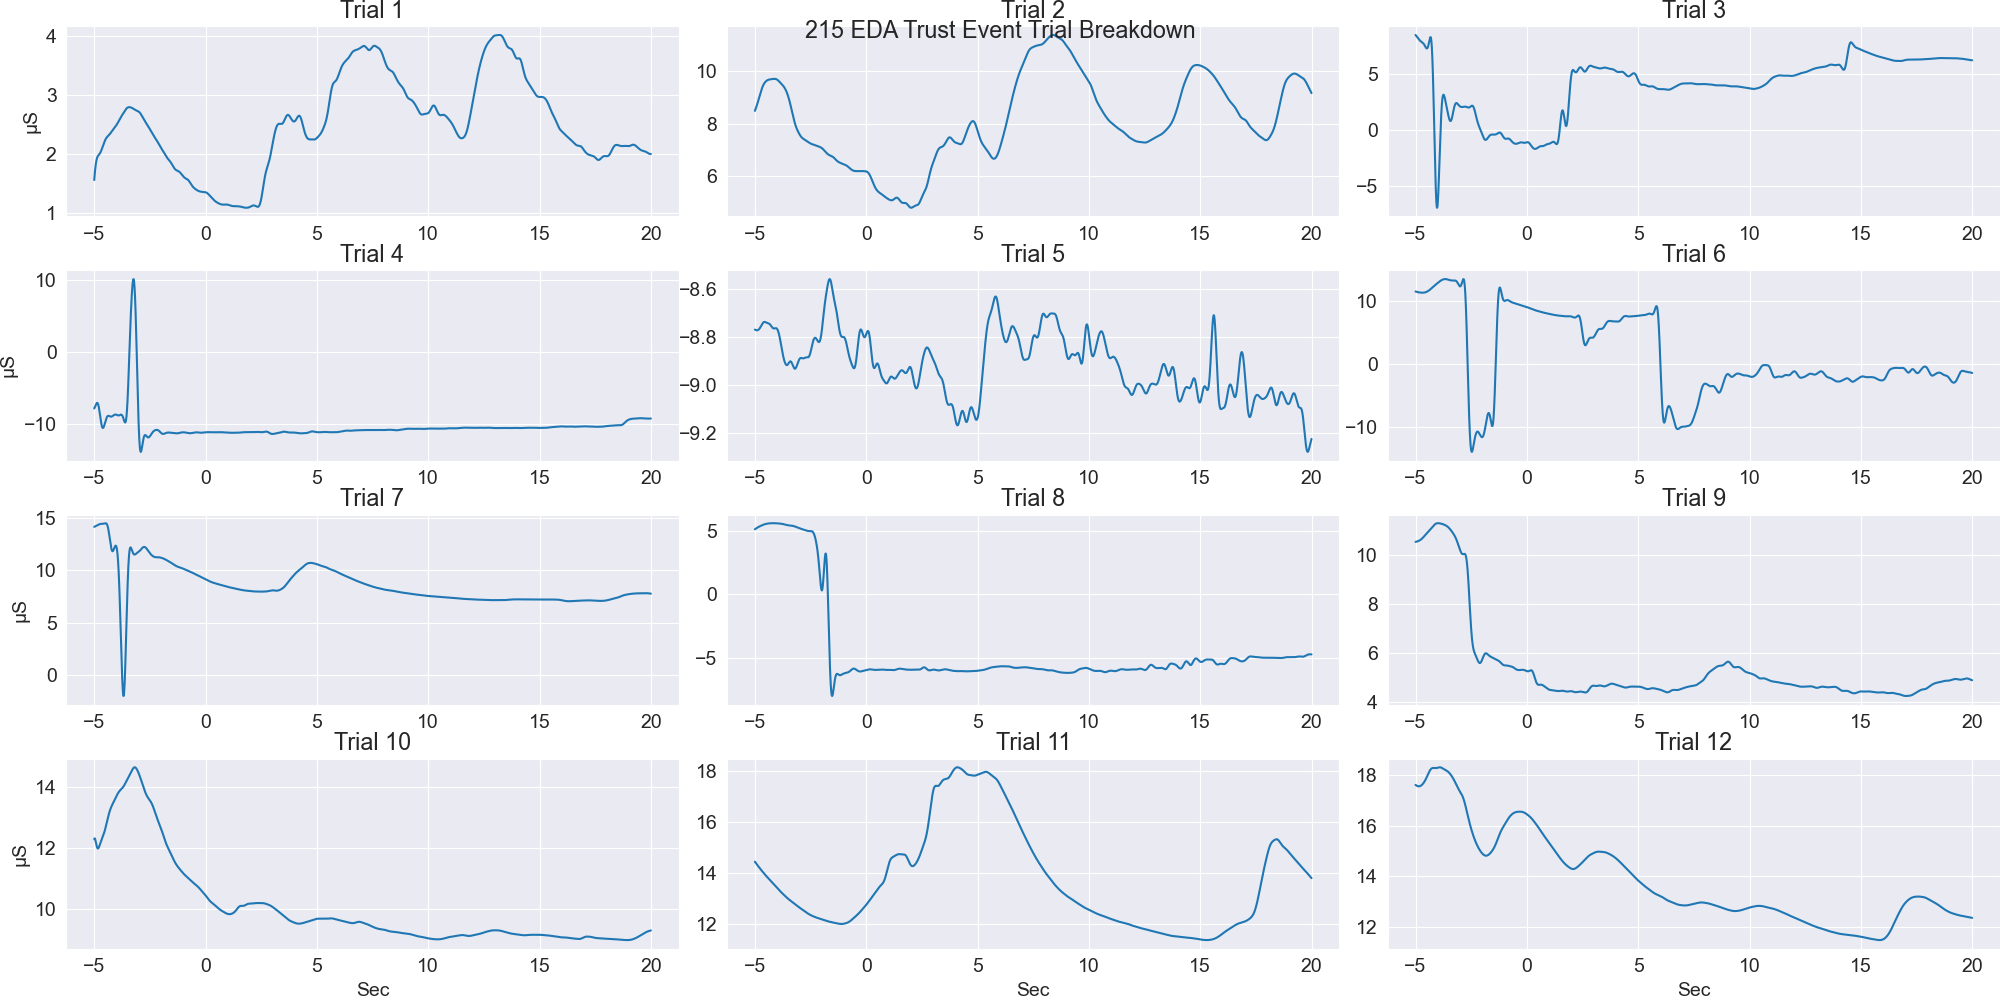

In [41]:
fig, eda_trust_axs = plt.subplots(4, 3,figsize=(20,10))
eda_trust_axs[0,0].plot(x_axis_trust_event, eda_trust_event[1]['EDA_Clean'])

eda_trust_axs[0,0].set_ylabel('μS')
eda_trust_axs[0,0].set_title('Trial 1')
#eda_trust_axs[0,0].set_ylim(-.5,1)

eda_trust_axs[0,1].plot(x_axis_trust_event, eda_trust_event[2]['EDA_Clean'])

eda_trust_axs[0,1].set_title('Trial 2')
#eda_trust_axs[0,1].set_ylim(-.5,1)

eda_trust_axs[0,2].plot(x_axis_trust_event, eda_trust_event[3]['EDA_Clean'])

eda_trust_axs[0,2].set_title('Trial 3')
#eda_trust_axs[0,2].set_ylim(-.5,1)

eda_trust_axs[1,0].plot(x_axis_trust_event, eda_trust_event[4]['EDA_Clean'])

eda_trust_axs[1,0].set_ylabel('μS')
eda_trust_axs[1,0].set_title('Trial 4')
#eda_trust_axs[1,0].set_ylim(-.5,1)

eda_trust_axs[1,1].plot(x_axis_trust_event, eda_trust_event[5]['EDA_Clean'])

eda_trust_axs[1,1].set_title('Trial 5')
#eda_trust_axs[1,1].set_ylim(-.5,1)

eda_trust_axs[1,2].plot(x_axis_trust_event, eda_trust_event[6]['EDA_Clean'])

eda_trust_axs[1,2].set_title('Trial 6')
#eda_trust_axs[1,2].set_ylim(-.5,1)

eda_trust_axs[2,0].plot(x_axis_trust_event, eda_trust_event[7]['EDA_Clean'])

eda_trust_axs[2,0].set_ylabel('μS')
eda_trust_axs[2,0].set_title('Trial 7')
#eda_trust_axs[2,0].set_ylim(-.5,1)

eda_trust_axs[2,1].plot(x_axis_trust_event, eda_trust_event[8]['EDA_Clean'])

eda_trust_axs[2,1].set_title('Trial 8')
#eda_trust_axs[2,1].set_ylim(-.5,1)

eda_trust_axs[2,2].plot(x_axis_trust_event, eda_trust_event[9]['EDA_Clean'])

eda_trust_axs[2,2].set_title('Trial 9')
#eda_trust_axs[2,2].set_ylim(-.5,1)

eda_trust_axs[3,0].plot(x_axis_trust_event, eda_trust_event[10]['EDA_Clean'])
eda_trust_axs[3,0].set_xlabel('Sec')
eda_trust_axs[3,0].set_ylabel('μS')
eda_trust_axs[3,0].set_title('Trial 10')
#eda_trust_axs[3,0].set_ylim(-.5,1)

eda_trust_axs[3,1].plot(x_axis_trust_event, eda_trust_event[11]['EDA_Clean'])
eda_trust_axs[3,1].set_xlabel('Sec')

eda_trust_axs[3,1].set_title('Trial 11')
#eda_trust_axs[3,1].set_ylim(-.5,1)

eda_trust_axs[3,2].plot(x_axis_trust_event, eda_trust_event[12]['EDA_Clean'])
eda_trust_axs[3,2].set_xlabel('Sec')
eda_trust_axs[3,2].set_title('Trial 12')
#eda_trust_axs[3,2].set_ylim(-.5,1)

fig.tight_layout(pad=0)
title=part_number+' EDA Trust Event Trial Breakdown'
fig.suptitle(title)
plt.show()
plt.savefig(save_dir+title)


<IPython.core.display.Javascript object>


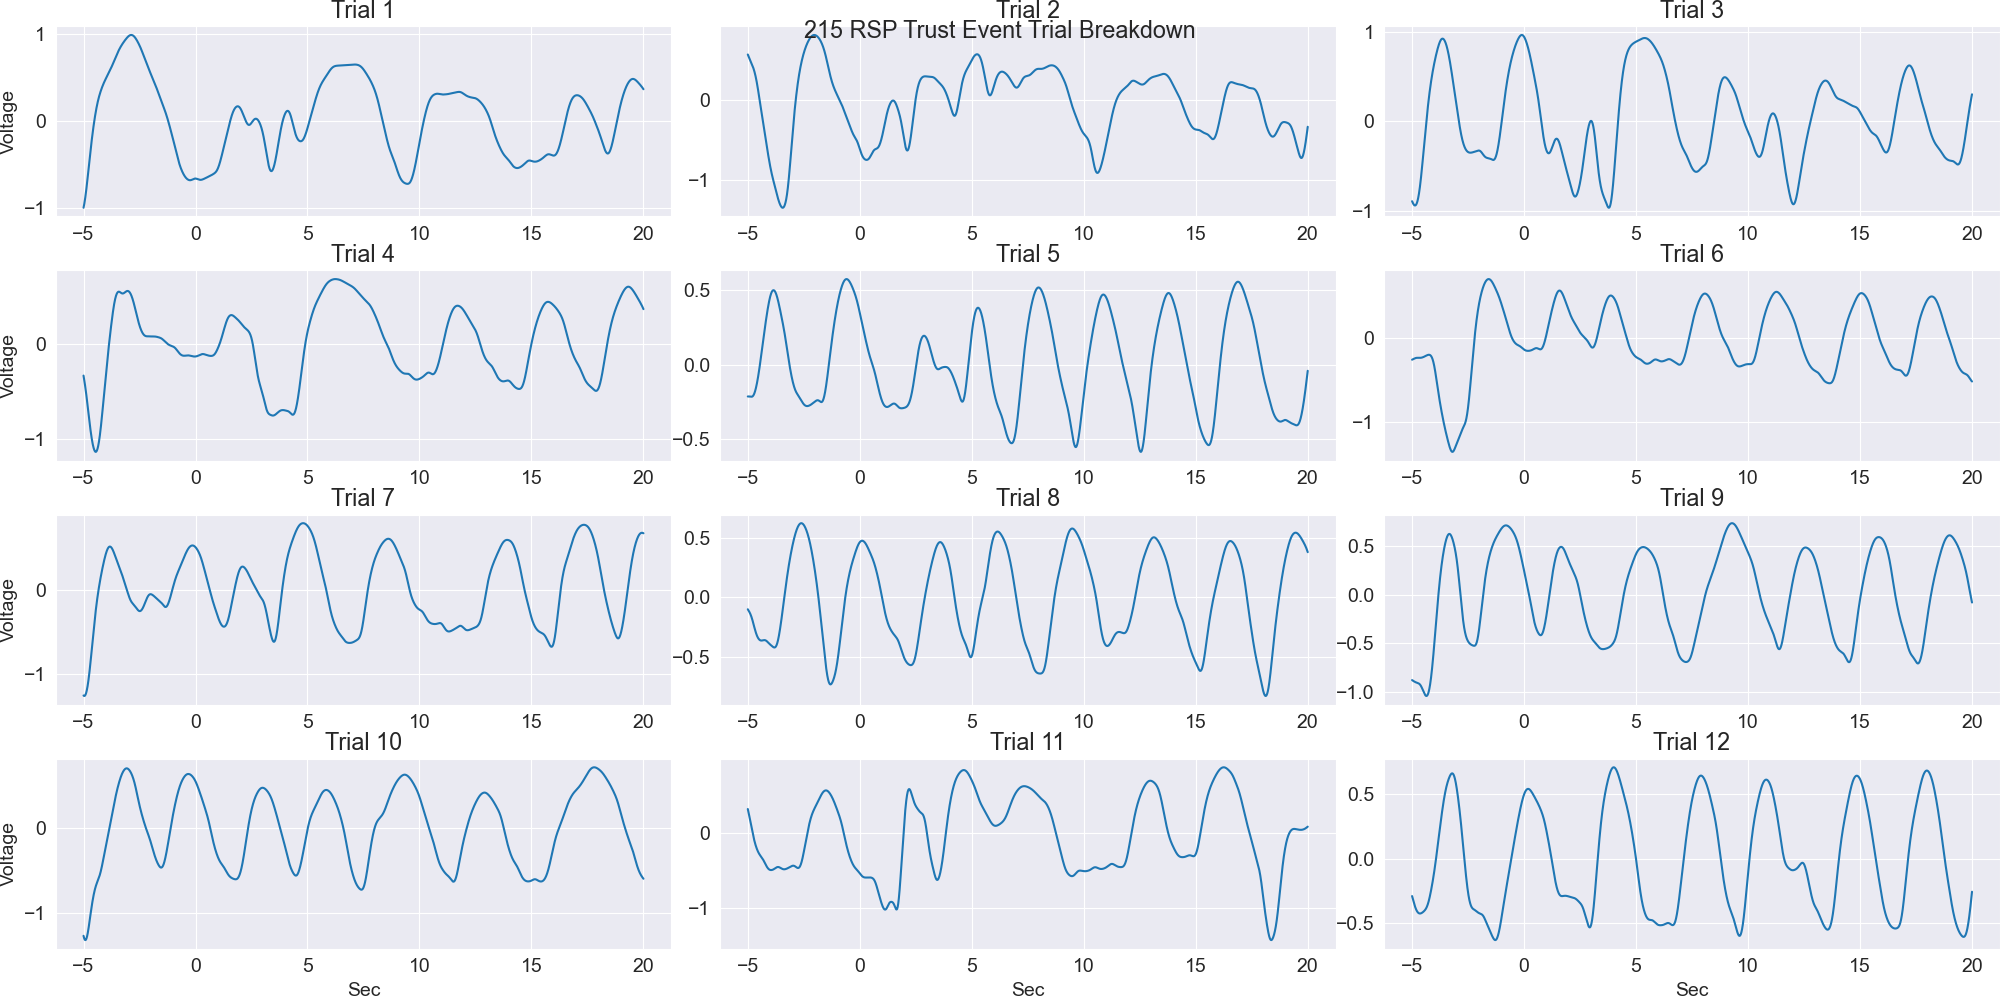

In [42]:
fig, rsp_trust_axs = plt.subplots(4, 3,figsize=(20,10))
rsp_trust_axs[0,0].plot(x_axis_trust_event, rsp_trust_event[1]['RSP_Clean'])

rsp_trust_axs[0,0].set_ylabel('Voltage')
rsp_trust_axs[0,0].set_title('Trial 1')
#rsp_trust_axs[0,0].set_ylim(-.5,1)

rsp_trust_axs[0,1].plot(x_axis_trust_event, rsp_trust_event[2]['RSP_Clean'])

rsp_trust_axs[0,1].set_title('Trial 2')
#rsp_trust_axs[0,1].set_ylim(-.5,1)

rsp_trust_axs[0,2].plot(x_axis_trust_event, rsp_trust_event[3]['RSP_Clean'])

rsp_trust_axs[0,2].set_title('Trial 3')
#rsp_trust_axs[0,2].set_ylim(-.5,1)

rsp_trust_axs[1,0].plot(x_axis_trust_event, rsp_trust_event[4]['RSP_Clean'])

rsp_trust_axs[1,0].set_ylabel('Voltage')
rsp_trust_axs[1,0].set_title('Trial 4')
#rsp_trust_axs[1,0].set_ylim(-.5,1)

rsp_trust_axs[1,1].plot(x_axis_trust_event, rsp_trust_event[5]['RSP_Clean'])

rsp_trust_axs[1,1].set_title('Trial 5')
#rsp_trust_axs[1,1].set_ylim(-.5,1)

rsp_trust_axs[1,2].plot(x_axis_trust_event, rsp_trust_event[6]['RSP_Clean'])

rsp_trust_axs[1,2].set_title('Trial 6')
#rsp_trust_axs[1,2].set_ylim(-.5,1)

rsp_trust_axs[2,0].plot(x_axis_trust_event, rsp_trust_event[7]['RSP_Clean'])

rsp_trust_axs[2,0].set_ylabel('Voltage')
rsp_trust_axs[2,0].set_title('Trial 7')
#rsp_trust_axs[2,0].set_ylim(-.5,1)

rsp_trust_axs[2,1].plot(x_axis_trust_event, rsp_trust_event[8]['RSP_Clean'])

rsp_trust_axs[2,1].set_title('Trial 8')
#rsp_trust_axs[2,1].set_ylim(-.5,1)

rsp_trust_axs[2,2].plot(x_axis_trust_event, rsp_trust_event[9]['RSP_Clean'])

rsp_trust_axs[2,2].set_title('Trial 9')
#rsp_trust_axs[2,2].set_ylim(-.5,1)

rsp_trust_axs[3,0].plot(x_axis_trust_event, rsp_trust_event[10]['RSP_Clean'])
rsp_trust_axs[3,0].set_xlabel('Sec')
rsp_trust_axs[3,0].set_ylabel('Voltage')
rsp_trust_axs[3,0].set_title('Trial 10')
#rsp_trust_axs[3,0].set_ylim(-.5,1)

rsp_trust_axs[3,1].plot(x_axis_trust_event, rsp_trust_event[11]['RSP_Clean'])
rsp_trust_axs[3,1].set_xlabel('Sec')

rsp_trust_axs[3,1].set_title('Trial 11')
#rsp_trust_axs[3,1].set_ylim(-.5,1)

rsp_trust_axs[3,2].plot(x_axis_trust_event, rsp_trust_event[12]['RSP_Clean'])
rsp_trust_axs[3,2].set_xlabel('Sec')
rsp_trust_axs[3,2].set_title('Trial 12')
#rsp_trust_axs[3,2].set_ylim(-.5,1)

fig.tight_layout(pad=0)
title=part_number+' RSP Trust Event Trial Breakdown'
fig.suptitle(title)
plt.show()
plt.savefig(save_dir+title)


C:\Users\BIOPACMan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


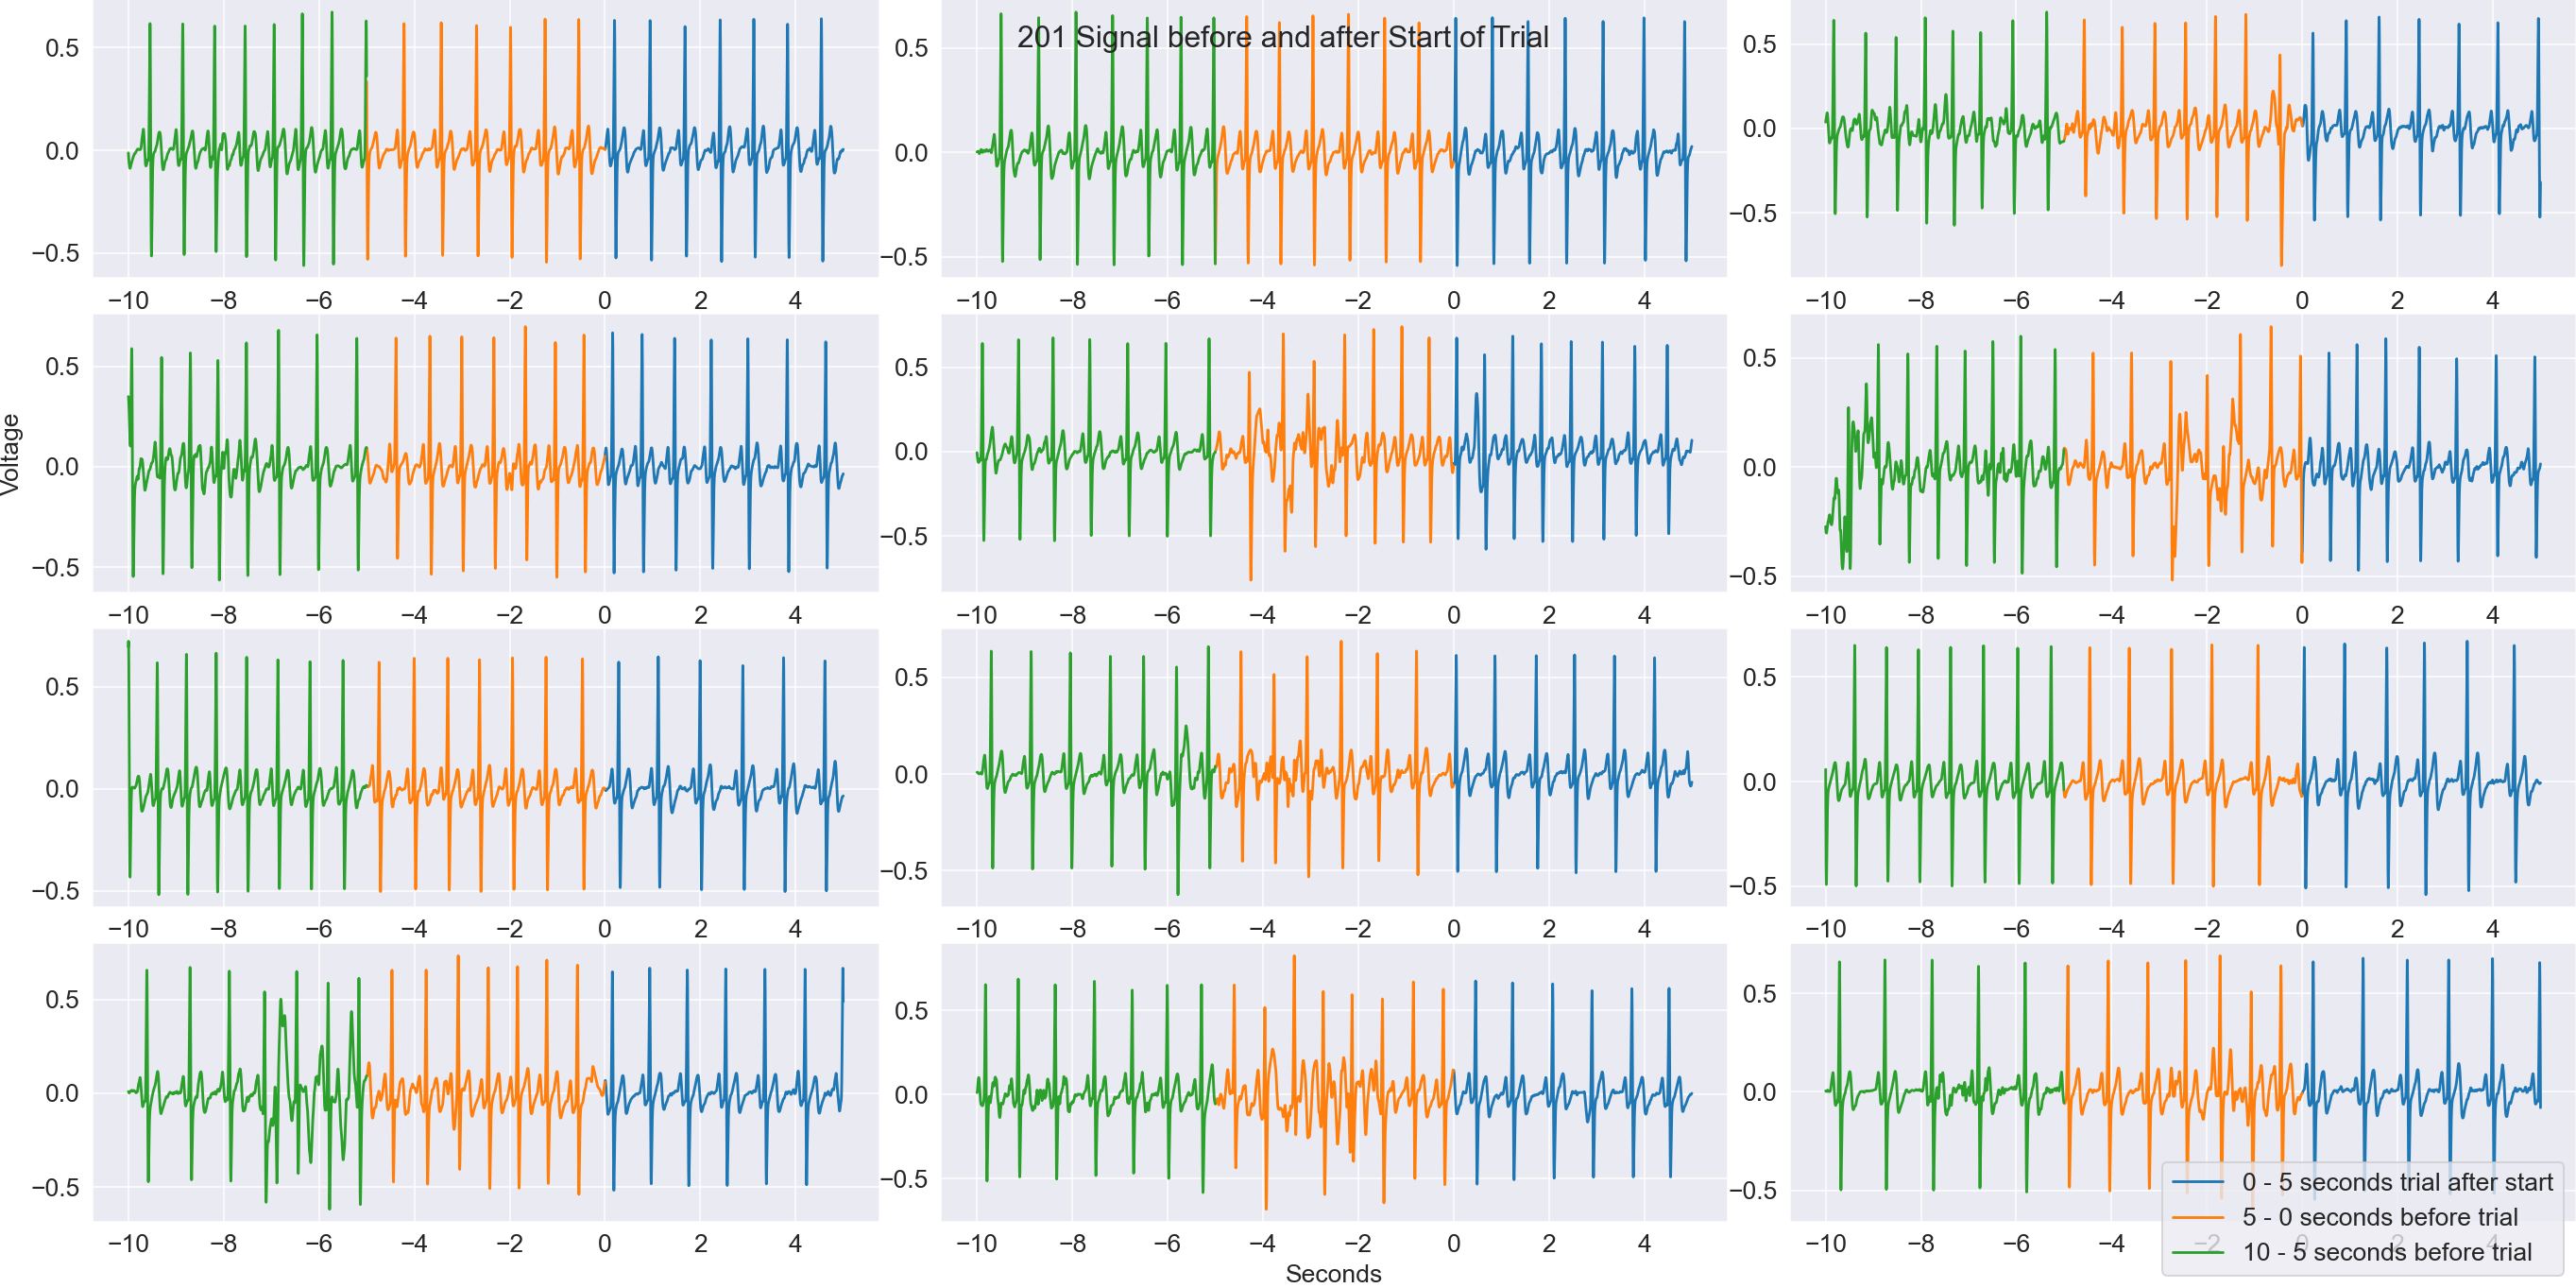

In [126]:
fig, ax = plt.subplots(4, 3,figsize=(20,10))
trial_num = 1
for i in range(0,4):
    for j in range(0,3):
        ax[i,j].plot(x_axis_pilot[0:10000], ecg_pilot_interval[trial_num]['ECG_Clean'][0:5],label='0 - 5 seconds trial after start')

        x2 = np.linspace(-5, ecg_pilot_interval[trial_num].shape[0]/ sampling_rate -5, ecg_pilot_interval[trial_num].shape[0])

        ecg2 = nk.epochs_create(ecg, events, sampling_rate=rate, epochs_start=-5, epochs_end=45)

        ax[i,j].plot(x2[0:10000],ecg2[trial_num]['ECG_Clean'][:0],label='5 - 0 seconds before trial')

        x3 = np.linspace(-10, ecg_pilot_interval[trial_num].shape[0]/ sampling_rate -10, ecg_pilot_interval[trial_num].shape[0])

        ecg3 = nk.epochs_create(ecg, events, sampling_rate=rate, epochs_start=-10, epochs_end=40)

        ax[i,j].plot(x3[0:10000],ecg3[trial_num]['ECG_Clean'][:-5],label='10 - 5 seconds before trial')

        title = str(trial_num)
        ax[i,j].set_title
        #ax[i,j].legend()
        
        trial_num +=1
        
#handles, labels = ax[3,2].get_legend_handles_labels()
ax[3,1].set_xlabel('Seconds')
ax[1,0].set_ylabel('Voltage')
fig.legend(handles, labels, loc='lower right')
fig.tight_layout(pad=0)
title=part_number+' Signal before and after Start of Trial '
fig.suptitle(title)
plt.show()
#plt.legend()
plt.savefig(save_dir+title)

In [2]:
data

RSP       EDA       ECG      TRIG
0        6.301880 -0.013770 -0.064240  8.506165
1        6.301270 -0.013770 -0.065002  8.514709
2        6.301575 -0.012244 -0.067291  8.513184
3        6.301880 -0.016822 -0.069733  8.511353
4        6.302490 -0.016822 -0.072327  8.511047
...           ...       ...       ...       ...
8934441  4.641113  3.831445 -0.081787  8.501587
8934442  4.640198  3.831445 -0.080566  8.489075
8934443  4.640198  3.832971 -0.078278  8.507385
8934444  4.641113  3.832971 -0.076904  8.491211
8934445  4.642944  3.829919 -0.075836  8.501587

[8934446 rows x 4 columns]

<IPython.core.display.Javascript object>


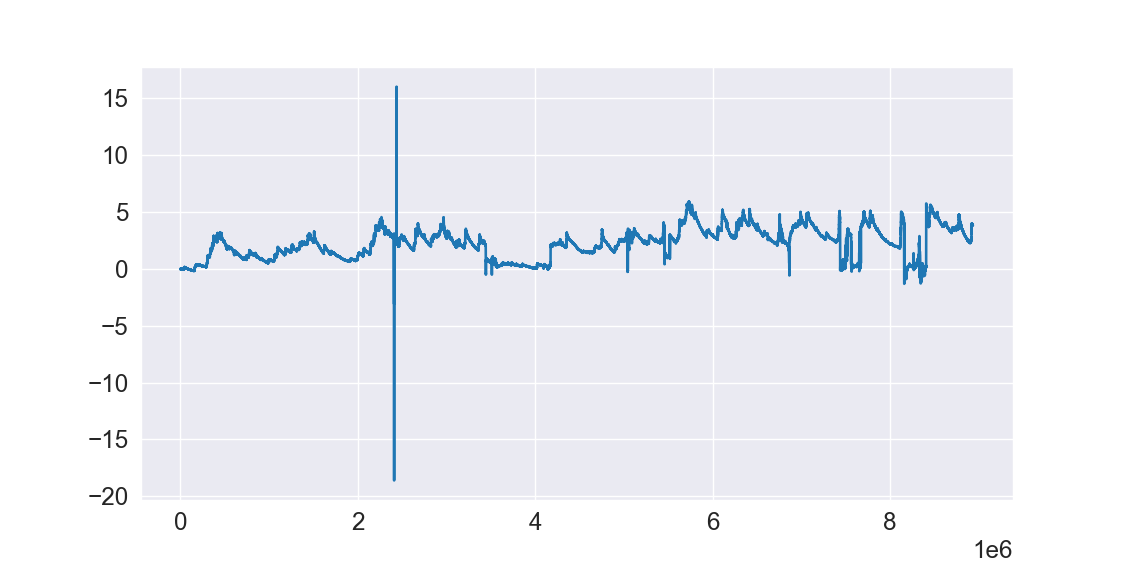

In [3]:
plt.figure()
plt.plot(data['EDA'])

<IPython.core.display.Javascript object>


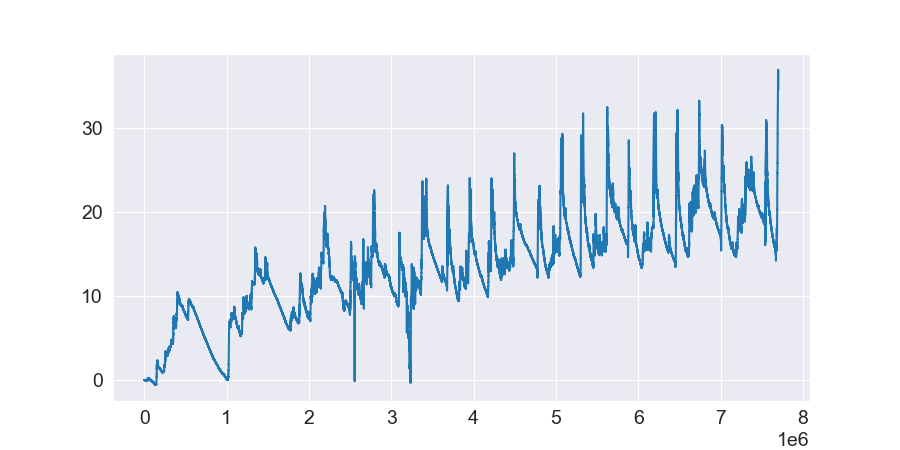

<IPython.core.display.Javascript object>


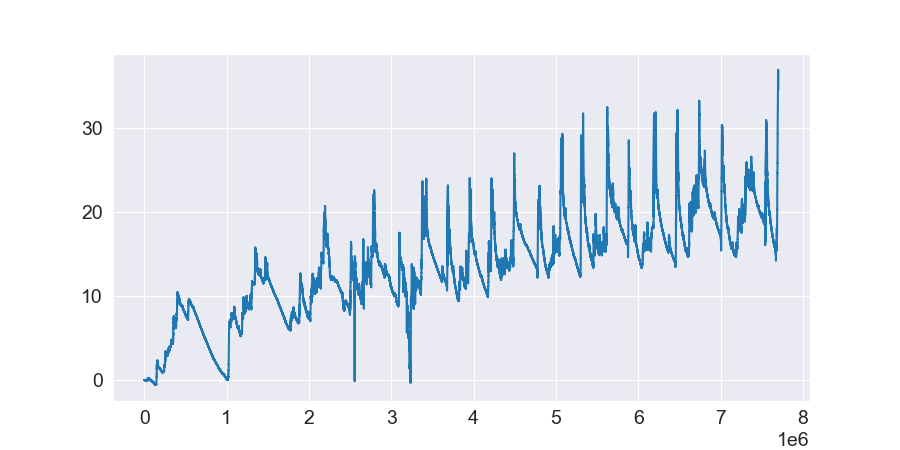

In [2]:
part_number = '208';

data_file = '../data/part'+part_number+'/part'+part_number+'_pilot.acq'
rate = 2000

data, sampling_rate = nk.read_acqknowledge(data_file)
data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                            "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})

plt.figure()
plt.plot(data['EDA'])

plt.figure()
centered_d = data['EDA'].subtract(data['EDA'][0])
plt.plot(centered_d)